<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab 7: *Imbalanced Classification & Neural Network***

### **Tenggat Waktu: 18 Mei 2025, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: `A_Lab7_2206123456_Iron Fist.ipynb`. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 18 Mei 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.
10. Kesalahan submisi merupakan tanggung jawab mahasiswa dan akan dikenakan penalti sesuai dengan ketentuan yang berlaku. Asisten dosen tidak menerima submisi di luar Scele.


In [1]:
# Isi dengan data diri Anda
NAMA = "Khansa Mahira"
KELAS = "C"
NPM = "2206819413"
USERNAME_KAGGLE = "khansamahira"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "Gemini",
    "ChatGPT",
    "Perplexity AI",
    "Black Box AI"
]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Khansa Mahira dari kelas C dengan NPM 2206819413, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Khansa Mahira)


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from numpy import where
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.base import clone

# **Imbalanced Classification**

Imbalanced classification adalah masalah dalam klasifikasi di mana dataset training memiliki distribusi kelas yang tidak seimbang, dengan jumlah sampel pada satu kelas (minoritas) jauh lebih sedikit dibanding kelas lainnya (mayoritas). Masalah ini umum terjadi di dunia nyata karena dataset jarang memiliki distribusi kelas yang benar-benar seimbang.

### **Dampak Ketidakseimbangan Kelas**

Ketidakseimbangan distribusi kelas dapat menyebabkan:
- Model menjadi bias terhadap kelas mayoritas karena lebih banyak data
- Kesulitan memprediksi kelas minoritas karena kurangnya pola/data pelatihan
- Potensi kesalahan klasifikasi yang serius, terutama ketika kelas minoritas justru lebih penting (contoh: deteksi penyakit, spam email)

Contoh kasus nyata:
- Dalam deteksi spam, email normal jauh lebih banyak daripada spam
- Pada diagnosa medis, pasien sehat biasanya lebih banyak daripada yang sakit

### **Tingkat Ketidakseimbangan**

Berdasarkan tingkat ketidakseimbangannya, masalah ini dapat dikategorikan menjadi:

1. **Slight Imbalance**  
   Ketidakseimbangan dengan rasio tidak terlalu ekstrim (contoh: 4:6). Masih bisa ditangani seperti klasifikasi biasa.

2. **Severe Imbalance**  
   Ketidakseimbangan dengan rasio ekstrim (1:100 atau lebih). Membutuhkan penanganan khusus karena sangat mempengaruhi performa model.

### **Metode Penanganan**

Dua pendekatan utama untuk menyeimbangkan dataset:

1. **Oversampling**  
   Menambah sampel data pada kelas minoritas (baik dengan duplikasi atau teknik generatif)

2. **Undersampling**  
   Mengurangi sampel data pada kelas mayoritas untuk menyeimbangkan distribusi

Penanganan imbalanced dataset sangat penting dilakukan sebelum pelatihan model, karena kebanyakan algoritma machine learning berasumsi dataset seimbang. Tanpa penanganan yang tepat, model akan cenderung mengabaikan kelas minoritas yang mungkin justru lebih kritis.

### Slightly Imbalanced

In [4]:
# Membuat dataset
X_slight, y_slight = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.6], # ratio 4:6
    class_sep=0.1,
    flip_y=0,
    random_state=2
)

# Melihat distribusi kelas pada dataset
counter_y_slight = Counter(y_slight)
print(counter_y_slight)

Counter({np.int64(0): 6000, np.int64(1): 4000})


### Severely Imbalanced

In [5]:
# Membuat dataset severely imbalanced
X_severe, y_severe = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.99], # ratio 99:1
    class_sep=0.1,
    flip_y=0,
    random_state=2
)

# Melihat distribusi kelas pada dataset
counter_y_severe = Counter(y_severe)
print(counter_y_severe)

Counter({np.int64(0): 9900, np.int64(1): 100})


### Visualisasi Scatter Plot dari kedua jenis Imbalanced Dataset

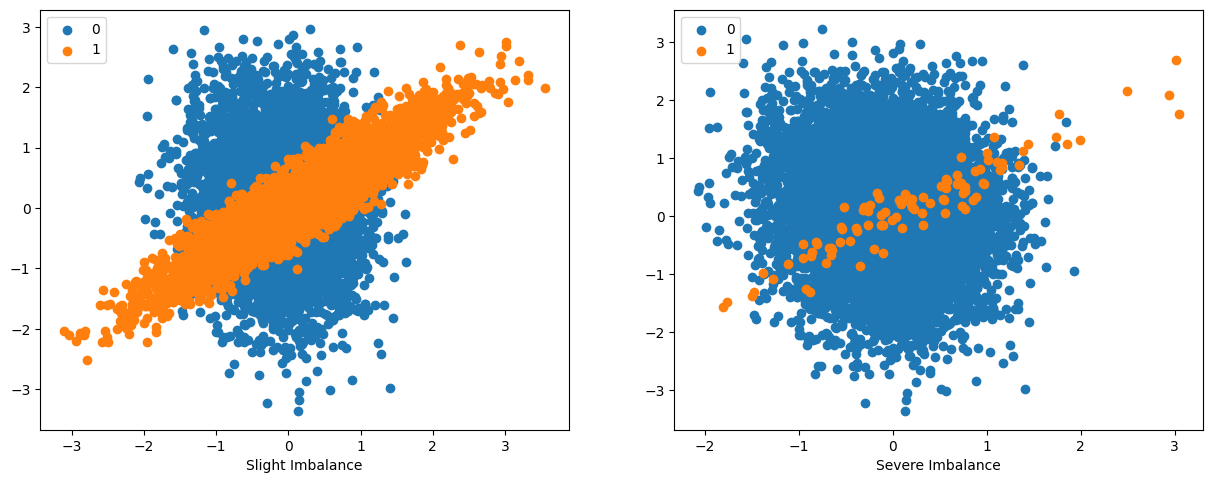

In [6]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
plt.xlabel('Slight Imbalance')

for label, _ in counter_y_slight.items():
    row_ix = where(y_slight == label)[0]
    plt.scatter(X_slight[row_ix, 0], X_slight[row_ix, 1], label=str(label))
    plt.legend()

plt.subplot(2,2,2)
plt.xlabel('Severe Imbalance')

for label, _ in counter_y_slight.items():
    row_ix = where(y_severe == label)[0]
    plt.scatter(X_severe[row_ix, 0], X_severe[row_ix, 1], label=str(label))
    plt.legend()

plt.show()

Dalam visualisasi scatter plot yang ditampilkan, perbedaan antara *slight imbalance* dan *severe imbalance* sangat signifikan. *Severely Imbalaced* ditandai dengan perbandingan jumlah data yang jauh lebih besar antara kelas mayoritas dan minoritas, mencapai rasio 99:1. Sementara itu, pada *Slightly Imbalanced*, perbedaan jumlah data antara kedua kelas tidak terlalu ekstrem, dengan rasio 6:4.

## **Pengaruh Imbalance Dataset Terhadap Performa Model Klasifikasi**

Imbalance dataset akan berpengaruh kepada performa model klasifikasi yang digunakan.
Kita akan menggunakan model Decision Tree dan mengevaluasi model tersebut untuk dataset slight imbalance dan severe imbalance menggunakan beberapa metriks evaluasi. Perhatikan contoh di bawah untuk memahami lebih lanjut.

#### Metode Cross Validation

Evaluasi model di bawah ini akan menggunakan Stratified K-Fold Cross Validation dengan beberapa metrik evaluasi di antaranya: accuracy, f1 (macro), precision (macro), recall (macro).

Disini data - data sintetis hasil penambahan oversampling akan dilibatkan dalam evaluasi model, maka dari itu kita menggunakan Stratified K-Fold Cross Validation. Stratified K-Fold Cross Validation membagi dataset menjadi sejumlah k fold dataset, dimana k fold dataset itu dibagi menjadi training dan validation test dataset. Pada Stratified K-Fold Cross Validation, distribusi kelas pada setiap fold akan dibuat seproporsional mungkin, sehingga folds yang merupakan validation test dataset akan memiliki distribusi kelas yang hampir sama.

1. Evaluasi Model Decision Tree Dengan Slight Imbalance Dataset

In [7]:
classifier = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(classifier, X_slight, y_slight, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.7263000000000001
f1_macro score: 0.7115894583087738
precision_macro score: 0.7131363324619693
recall_macro score: 0.7151666666666667


Kesimpulan Pada Hasil Evaluasi Slight Imbalance:
- **Akurasi dan metrik lain relatif seimbang** (selisih <2%)
- Model mampu mempelajari pola kedua kelas dengan baik meski ada ketidakseimbangan kecil
- **Indikator**: Ketika semua metrik (accuracy, F1, precision, recall) memiliki nilai yang relatif sama, model bekerja cukup baik untuk kedua kelas

2. Evaluasi Model Decision Tree Dengan Severe Imbalance Dataset

In [8]:
classifier = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(classifier, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.9829000000000001
f1_macro score: 0.5627343508941377
precision_macro score: 0.5539516315554716
recall_macro score: 0.5410606060606061



Kesimpulan Pada Hasil Evaluasi Severe Imbalance:
- **Akurasi sangat tinggi (98.27%)** tetapi metrik lain rendah (~53%)
- **Masalah utama**:
  - Model hanya akurat memprediksi kelas mayoritas
  - Gagal memprediksi kelas minoritas (terlihat dari F1/precision/recall yang rendah)
  - "Accuracy paradox": Akurasi tinggi tapi tidak berguna untuk tujuan bisnis

#### ROC Curve

Kurva ROC (Receiver Operating Characteristic) adalah grafik yang **memvisualisasikan kinerja model klasifikasi biner dengan memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR)** pada berbagai nilai **threshold** klasifikasi. Intinya, kurva ini menunjukkan seberapa baik model dapat **membedakan antara kelas positif dan negatif** seiring dengan perubahan batas keputusannya.

 Pada data tidak seimbang, ROC penting karena:  
- **Akurasi bisa menyesatkan**, sedangkan ROC fokus pada **kinerja kelas minoritas (TPR) vs. kesalahan pada mayoritas (FPR)**.  
- **AUC (Area Under the Curve)** mengukur kualitas pemisahan kelas; semakin mendekati 1, semakin baik.  

ROC membantu memilih *threshold* optimal:  
- *Threshold* rendah → **tingkatkan TPR** (penting jika *false negatif* mahal).  
- *Threshold* tinggi → **kurangi FPR** (penting jika *false positif* mahal).  
Dengan demikian, ROC memberikan **trade-off terbaik** yang tidak terlihat dari akurasi saja.

1. ROC Curve untuk Slightly Imbalanced Dataset

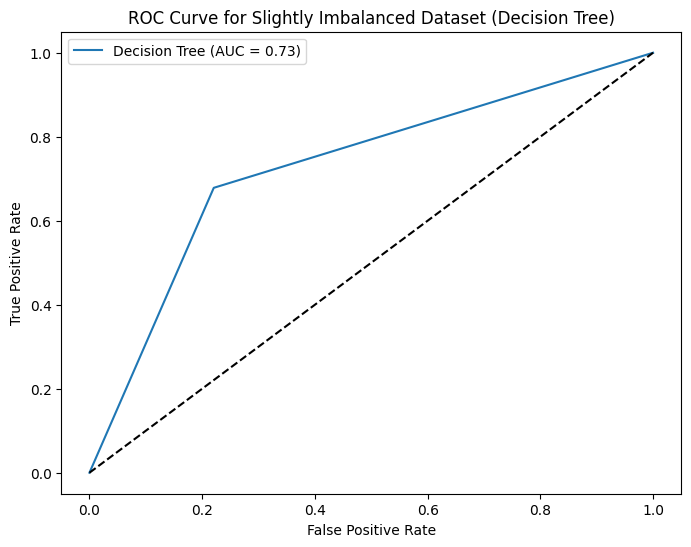

In [9]:
# Split data menjadi training dan testing untuk evaluasi ROC curve
X_train_slight, X_test_slight, y_train_slight, y_test_slight = train_test_split(
    X_slight, y_slight, test_size=0.3, stratify=y_slight, random_state=42
)

# Inisialisasi model Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Latih model pada data training
classifier.fit(X_train_slight, y_train_slight)

# Prediksi probabilitas pada data testing
y_pred_proba_slight = classifier.predict_proba(X_test_slight)[:, 1]

# Hitung ROC curve dan AUC
fpr_slight, tpr_slight, thresholds_slight = roc_curve(y_test_slight, y_pred_proba_slight)
auc_slight = roc_auc_score(y_test_slight, y_pred_proba_slight)

# Visualisasikan ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_slight, tpr_slight, label=f'Decision Tree (AUC = {auc_slight:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Slightly Imbalanced Dataset (Decision Tree)')
plt.legend()
plt.show()

Penjelasan ROC Curve pada evaluasi model Decision Tree pada Slightly Imbalanced Dataset:

- **Kinerja Baik**: Kemampuan kuat membedakan kelas positif/negatif (nilai AUC 0.81 tergolong baik)  
- **Keunggulan**:  
  - Jauh lebih akurat daripada tebakan acak (*AUC=0.5*)  
  - Mencapai **TPR tinggi** dengan **FPR rendah** di awal (model efektif mendeteksi positif tanpa banyak kesalahan)  
  - Kenaikan FPR stabil saat mengejar TPR lebih tinggi (*tidak melonjak drastis*)  
- **Implikasi**: Cocok untuk dataset *slightly imbalanced* dengan kebutuhan prediksi seimbang.  

2. ROC Curve untuk Severely Imbalanced Dataset

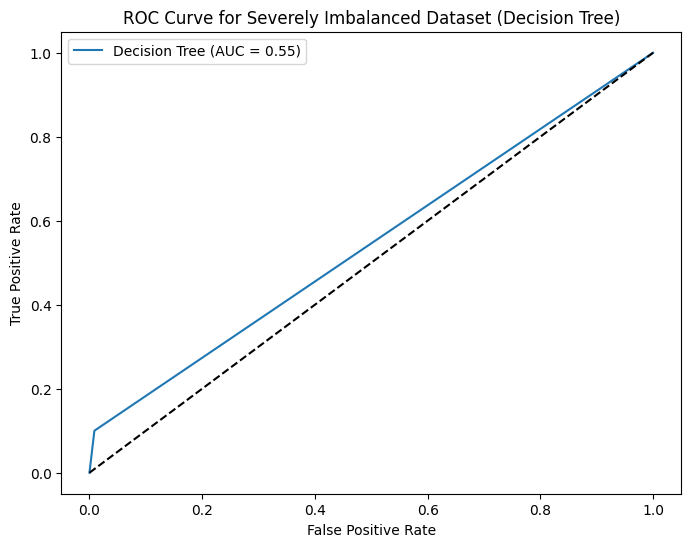

In [10]:
# Split data menjadi training dan testing untuk evaluasi ROC curve
X_train_severe, X_test_severe, y_train_severe, y_test_severe = train_test_split(
    X_severe, y_severe, test_size=0.3, stratify=y_severe, random_state=42
)

# Inisialisasi model Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Latih model pada data training
classifier.fit(X_train_severe, y_train_severe)

# Prediksi probabilitas pada data testing
y_pred_proba_severe = classifier.predict_proba(X_test_severe)[:, 1]

# Hitung ROC curve dan AUC
fpr_severe, tpr_severe, thresholds_severe = roc_curve(y_test_severe, y_pred_proba_severe)
auc_severe = roc_auc_score(y_test_severe, y_pred_proba_severe)

# Visualisasikan ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_severe, tpr_severe, label=f'Decision Tree (AUC = {auc_severe:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Severely Imbalanced Dataset (Decision Tree)')
plt.legend()
plt.show()

Penjelasan ROC Curve pada evaluasi model Decision Tree pada Severely Imbalanced Dataset:

- **Kurva Biru (Decision Tree)**: Menunjukkan trade-off antara **TPR (Sensitivity)** dan **FPR** di berbagai *threshold*.  
- **AUC = 0.55**: Menandakan kemampuan model **sedang (di atas tebakan acak, tapi jauh dari sempurna)** dalam membedakan kelas minoritas dan mayoritas.  
- **Bentuk Kurva**:  
  - Di atas garis diagonal (*AUC > 0.5*) → Lebih baik dari tebakan acak.  
  - Awalnya **TPR naik cepat** saat FPR rendah, lalu melambat → Untuk **TPR lebih tinggi**, model harus **menerima FPR yang lebih besar**.  


**Perbandingan dengan Severely Imbalanced**:

Terlihat jelas bahwa penanganan dataset yang *slightly imbalanced* menghasilkan AUC yang jauh lebih tinggi (0.73) dibandingkan dengan dataset yang *severely imbalanced* (0.55). Perbedaan signifikan ini **menggarisbawahi betapa krusialnya mengatasi ketidakseimbangan data**. Ketika ketidakseimbangan ekstrem, seperti pada kasus *severely imbalanced*, model kesulitan mempelajari karakteristik kelas minoritas yang sedikit jumlahnya, sehingga kemampuan pembedaannya menurun drastis.

Sebaliknya, distribusi kelas yang lebih merata pada dataset *slightly imbalanced* memungkinkan model Decision Tree untuk lebih efektif mengenali pola dari kedua kelas, yang pada akhirnya meningkatkan kinerja klasifikasi secara keseluruhan, seperti yang tercermin pada nilai AUC yang lebih baik. Ini memperjelas bahwa **mengabaikan ketidakseimbangan data dapat secara serius menghambat performa model, terutama dalam mengidentifikasi kelas minoritas yang seringkali menjadi fokus utama dalam banyak permasalahan nyata.**

### Rekomendasi Metrik Evaluasi:

| Situasi | Metrik yang Direkomendasikan |
|---------|-----------------------------|
| Slight imbalance | Accuracy masih bisa digunakan |
| Severe imbalance | F1-score, Precision, Recall (terutama untuk kelas minoritas) |
| Kasus kritis (e.g. medis) | Recall kelas minoritas paling penting |

**Catatan**: StratifiedKFold digunakan untuk menjaga proporsi kelas tiap fold, sehingga evaluasi lebih valid untuk imbalanced data.

![How-to-Deal-With-Imbalanced-Classification-and-Regression-Data_29-3372336075-1643136560469](https://i.imgur.com/FIboBIz.png)

*Sumber: [How to Deal With Imbalanced Classification and Regression Data.](https://neptune.ai/blog/how-to-deal-with-imbalanced-classification-and-regression-data)*

## **Penanganan Imbalanced Dataset**

Evaluasi sebelumnya telah menegaskan betapa krusialnya memeriksa ketidakseimbangan dalam suatu dataset. Hal ini menjadi sangat penting, terutama ketika fokus analisis tertuju pada pemahaman atau prediksi kelas minoritas.

Selanjutnya, akan ditunjukkan beberapa metode/teknik untuk menangani dataset. Dataset Severly Imbalanced sebelumnya akan kita gunakan untuk mempelajari setiap tipe dari penanganan imbalanced dataset.

In [11]:
X = X_severe
y = y_severe

In [12]:
import matplotlib.pyplot as plt
from collections import Counter
from numpy import where

# Jalankan method ini yang berguna untuk memvisualisasikan perbandingan dua buat dataset
def show_simulated_dataset_comparison(X1, X2, y1, y2, title1='Original dataset', title2='Sampling Dataset'):
    counter_y1 = Counter(y1)
    counter_y2 = Counter(y2)
    plt.figure(figsize=(15, 12))

    plt.subplot(2, 2, 1)
    plt.xlabel(f'{title1}\n{counter_y1}')  # Tambahkan jumlah kelas pada label sumbu x
    for label, _ in counter_y1.items():
        row_ix = where(y1 == label)[0]
        plt.scatter(X1[row_ix, 0], X1[row_ix, 1], label=f'{label} ({counter_y1[label]} buah)') # Tambahkan jumlah pada legend
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.xlabel(f'{title2}\n{counter_y2}')  # Tambahkan jumlah kelas pada label sumbu x
    for label, _ in counter_y2.items():
        row_ix = where(y2 == label)[0]
        plt.scatter(X2[row_ix, 0], X2[row_ix, 1], label=f'{label} ({counter_y2[label]} buah)') # Tambahkan jumlah pada legend
    plt.legend()

    plt.show()

### **Oversampling**

Oversampling adalah teknik untuk mengatasi ketidakseimbangan data dengan **memperbanyak jumlah sampel dari kelas minoritas** dalam dataset. Proses penambahan data ini umumnya terbagi dua cara: **duplikasi data** yang sudah ada dan pembentukan **data sintetik baru**.

Salah satu cara sederhana untuk menduplikasi data adalah random oversampling. Sementara itu, beberapa contoh metode yang lebih canggih dalam membuat data sintetik meliputi:

- Synthetic Minority Oversampling Technique (**SMOTE**),
- **Borderline-SMOTE**,
- **Borderline Oversampling** with **SVM**, dan
- Adaptive Synthetic Sampling (**ADASYN**).

Berikutnya, kita akan mempelajari definisi dasar dan cara mengimplementasikan kelima metode oversampling ini pada dataset simulasi yang kita gunakan. Untuk pemahaman yang lebih mendalam, disarankan untuk merujuk kembali pada materi kuliah atau sumber informasi lain di internet.

#### Random Oversampling

Metode oversampling yang menambahkan data minoritas dengan menduplikasikan data yang sudah ada secara acak. Data-data baru yang merupakan hasil penduplikasian tidak akan menambah informasi baru atau mensintesis datapoints baru/berbeda pada dataset

Counter({np.int64(0): 9900, np.int64(1): 9900})


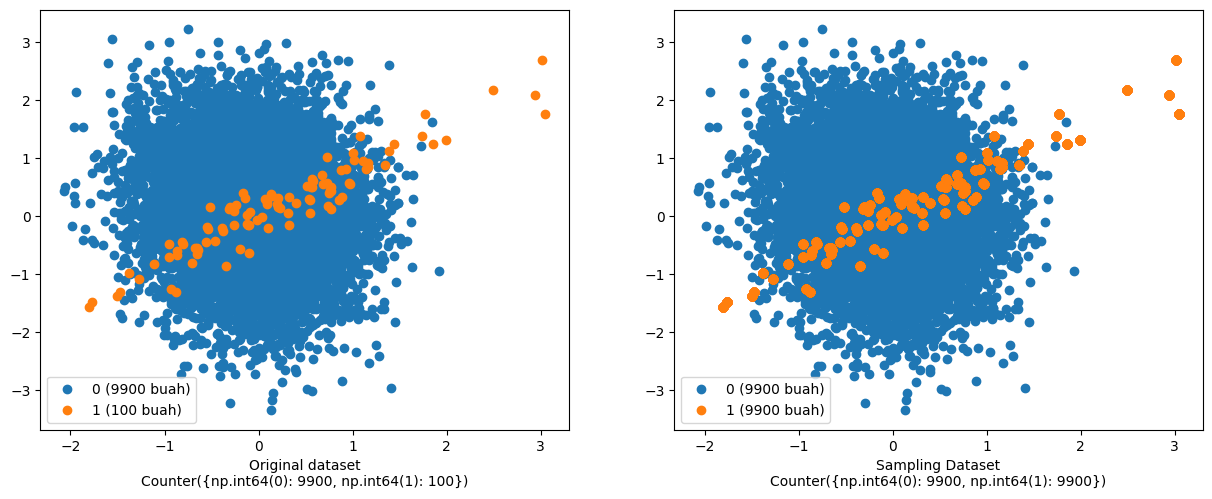

In [13]:
# Definisi random undersampling class
rand_over = RandomOverSampler(
    sampling_strategy='minority'
)

# Resampling berdasarkan dataset simulasi
X_rand_over, y_rand_over = rand_over.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_rand_over = Counter(y_rand_over)
print(counter_y_rand_over)

# Perbandingan scatter plot antara dataset asli dan dataset sampling
show_simulated_dataset_comparison(X1=X, X2=X_rand_over, y1=y, y2=y_rand_over)

Berdasarkan visualisasi scatter plot, tidak tampak perubahan signifikan antara dataset awal dan dataset setelah penerapan *random oversampling*. Ini disebabkan oleh metode *random oversampling* yang hanya menduplikasikan data yang sudah ada dari kelas minoritas di lokasi yang sama persis. Akibatnya, titik-titik data baru hasil *oversampling* bertumpuk dengan data aslinya, sehingga tidak menciptakan perbedaan visual yang jelas pada plot.

#### Synthetic Minority Oversampling Technique (SMOTE)

Berbeda dengan Random Oversampling, SMOTE mensintesis data baru dengan melakukan interpolasi antara data kelas minoritas dan data tetangganya. Tahapannya:
1. SMOTE memilih satu instance dari kelas minoritas secara acak dan mencari k nearest minority class neighbors nya
2. Pilih salah satu neighbor secara acak
3. Data baru yang dihasilkan akan terletak pada garis yang menghubungkan instance dan neighbornya

![SMOTE](https://i.imgur.com/OERi3e0.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.37*

Counter({np.int64(0): 9900, np.int64(1): 9900})


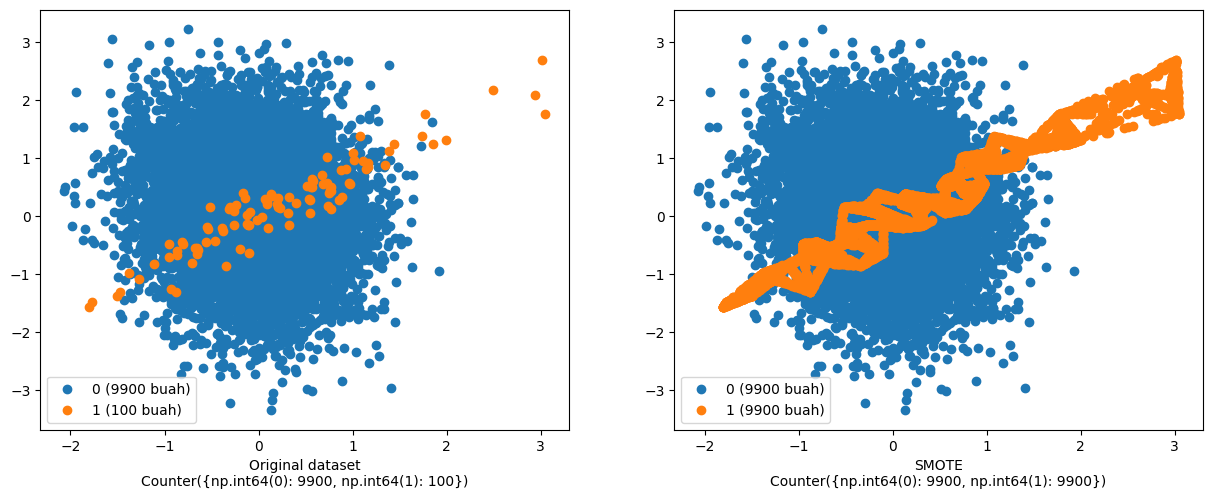

In [14]:
# Definisi SMOTE class
smote = SMOTE()

# Resampling berdasarkan dataset simulasi
X_smote, y_smote = smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_smote = Counter(y_smote)
print(counter_y_smote)

# Perbandingan scatter plot antara dataset asli dan dataset sampling
show_simulated_dataset_comparison(X1=X, X2=X_smote,
                                  y1=y, y2=y_smote,
                                  title2='SMOTE')

#### Borderline-SMOTE

Variasi dari metode SMOTE berfokus pada pembuatan data sintetis secara khusus untuk sampel kelas minoritas yang keliru diprediksi sebagai kelas mayoritas. Pendekatan ini, misalnya menggunakan model K-nearest neighbor, mengidentifikasi sampel kelas minoritas yang lokasinya berdekatan dengan sampel kelas mayoritas (area *missclassified*).

![Borderline-SMOTE](https://i.imgur.com/01UGsei.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.47*

Counter({np.int64(0): 9900, np.int64(1): 9900})


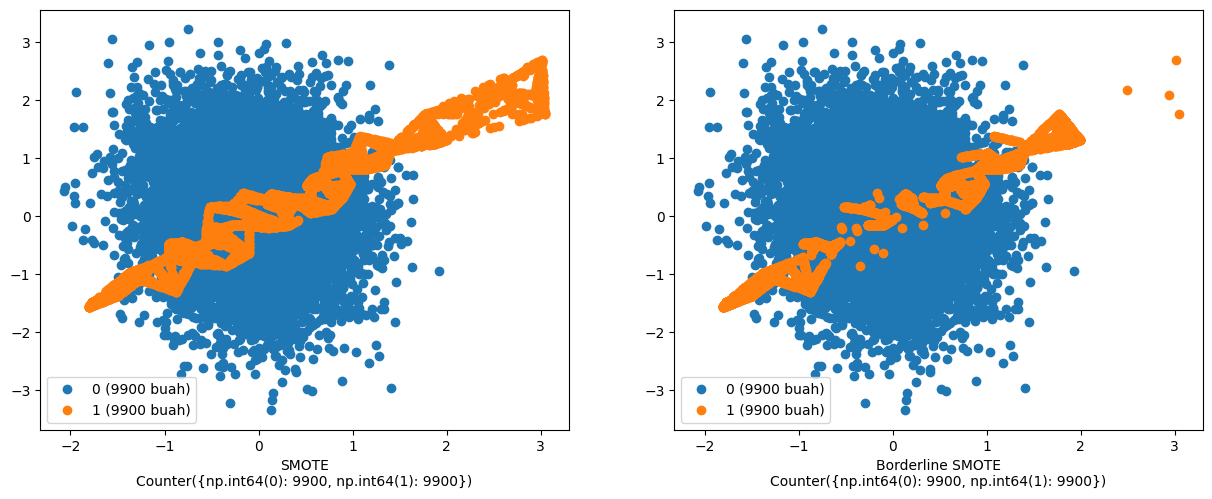

In [15]:
# Definisi Borderline SMOTE class
borderline_smote = BorderlineSMOTE()

# Resampling berdasarkan dataset simulasi
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

# Perbandingan scatter plot antara dataset SMOTE dan dataset Borderline SMOTE
show_simulated_dataset_comparison(X1=X_smote, X2=X_borderline_smote,
                                  y1=y_smote, y2=y_borderline_smote,
                                  title1='SMOTE', title2='Borderline SMOTE')

#### Borderline Oversampling with SVM

Metode ini, alih-alih memakai KNN untuk pra-klasifikasi data minoritas sebelum oversampling, menggunakan algoritma Support Vector Machine (SVM).

SVM dipakai untuk mengidentifikasi sampel minoritas yang berada di "batas" antara kelas mayoritas dan minoritas, lalu SMOTE diterapkan hanya pada sampel-sampel batas ini dengan harapan menghasilkan data sintetis yang lebih informatif dan efektif dalam meningkatkan batas keputusan klasifikasi.

Counter({np.int64(0): 9900, np.int64(1): 9900})


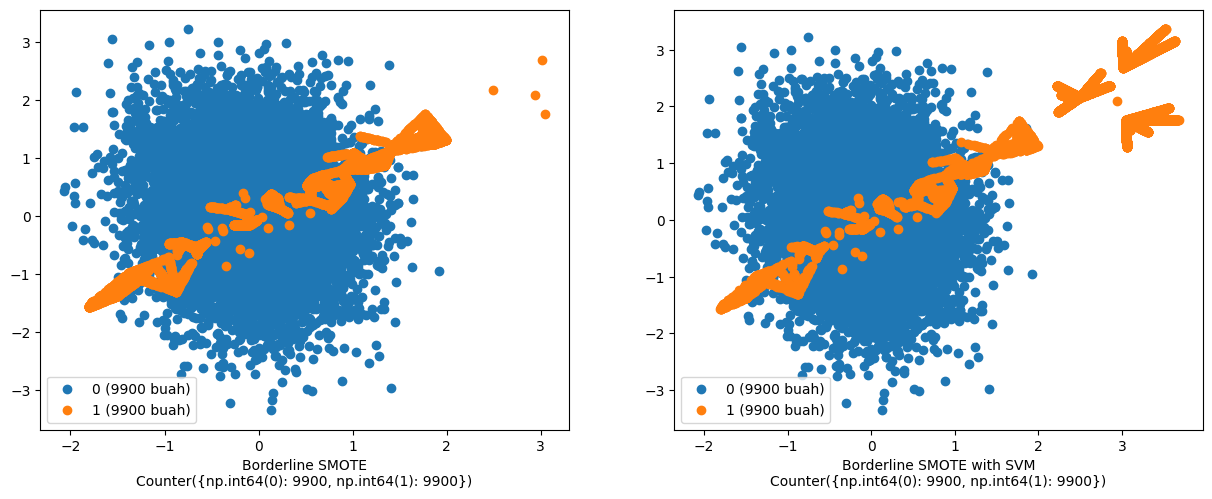

In [16]:
# Definisi Borderline SMOTE dengan SVM class
svm_smote = SVMSMOTE()

# Resampling berdasarkan dataset simulasi
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_svm_smote = Counter(y_svm_smote)
print(counter_y_svm_smote)

# Perbandingan scatter plot antara dataset Borderline SMOTE dan dataset Borderline SMOTE with SVM
show_simulated_dataset_comparison(X1=X_borderline_smote, X2=X_svm_smote,
                                  y1=y_borderline_smote, y2=y_svm_smote,
                                  title1='Borderline SMOTE', title2='Borderline SMOTE with SVM')

#### Adaptive Synthetic Sampling (ADASYN)

Dengan ADASYN, pembuatan data sintetik untuk kelas minoritas disesuaikan dengan seberapa sedikitnya data minoritas di sekitarnya dalam ruang fitur. Artinya, **area dengan populasi data minoritas yang rendah akan menghasilkan lebih banyak data sintetik**, sementara **area dengan banyak data minoritas akan menghasilkan lebih sedikit atau bahkan tidak ada data sintetik baru**.

![ADASYN](https://i.imgur.com/GfntcLW.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.52*

Counter({np.int64(1): 9925, np.int64(0): 9900})


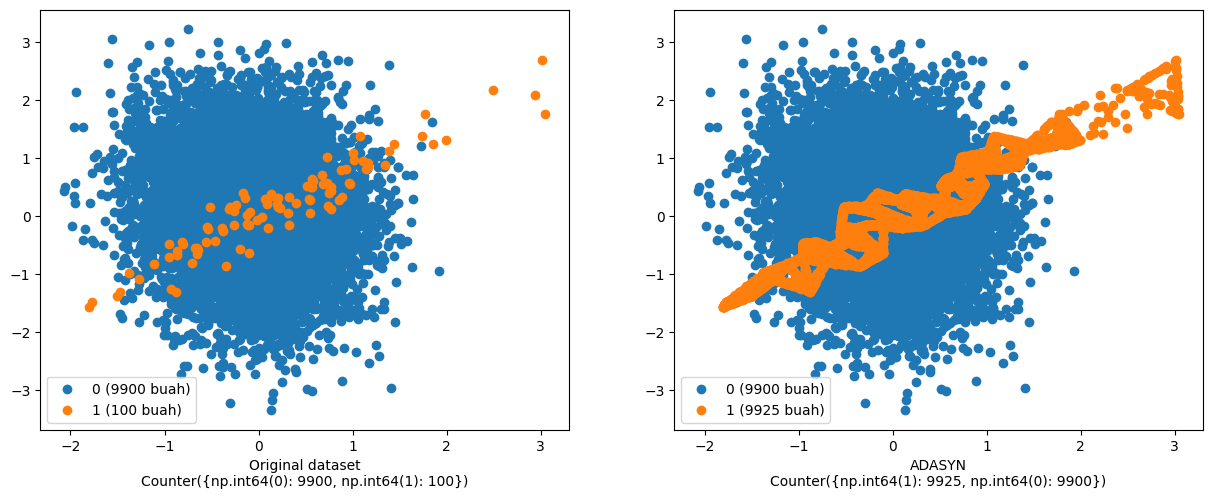

In [17]:
# Definisi ADASYN class
adasyn = ADASYN()

# Resampling berdasarkan dataset simulasi
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_adasyn = Counter(y_adasyn)
print(counter_y_adasyn)

# Perbandingan scatter plot antara dataset asli dan dataset ADASYN
show_simulated_dataset_comparison(X1=X , X2=X_adasyn,
                                  y1=y, y2=y_adasyn,
                                  title2='ADASYN')

### **Undersampling**

Undersampling adalah cara lain untuk menyeimbangkan distribusi kelas dalam dataset, yaitu dengan **mengurangi jumlah data dari kelas mayoritas**. Hal ini dilakukan misalnya dengan kelas mayoritas dari 1:99 menjadi 1:10, 1:1, dsb.

Beberapa metode undersampling yang umum digunakan antara lain:

- **Random Undersampling**,
- **Near Miss Undersampling**, dan
- **Tomek Link Undersampling**.

Selanjutnya, kita akan membahas definisi sederhana dan cara mengimplementasikan ketiga metode undersampling ini menggunakan dataset simulasi yang telah kita buat sebelumnya.

#### Random Undersampling

Metode ini melakukan pengambilan sampel secara acak dari kelas mayoritasnya untuk dihapus dari keseluruhan dataset.

Counter({np.int64(0): 100, np.int64(1): 100})


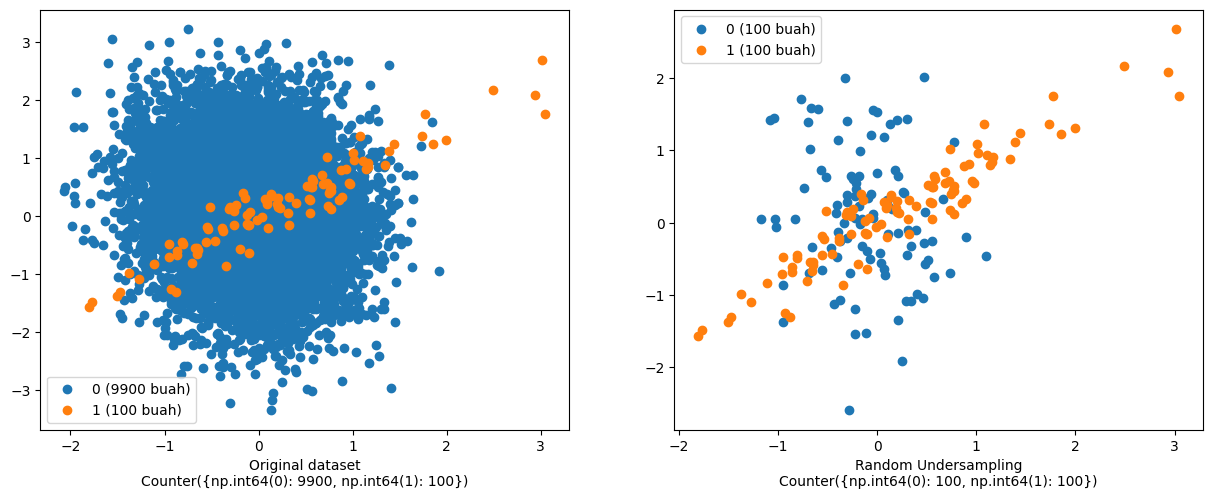

In [18]:
# Definisi ADASYN class
rand_under = RandomUnderSampler(
    sampling_strategy='majority'
)

# Resampling berdasarkan dataset simulasi
X_rand_under, y_rand_under = rand_under.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_rand_under = Counter(y_rand_under)
print(counter_y_rand_under)

# Perbandingan scatter plot antara dataset asli dan dataset ADASYN
show_simulated_dataset_comparison(X1=X , X2=X_rand_under,
                                  y1=y, y2=y_rand_under,
                                  title2='Random Undersampling')

#### Near Miss Undersampling

Near Miss Undersampling adalah metode pengurangan sampel kelas mayoritas yang memilih data berdasarkan **kedekatan jaraknya dengan data dari kelas minoritas**. Metode ini memiliki beberapa variasi, yaitu **NearMiss-1**, **NearMiss-2**, dan **NearMiss-3**.

![NearMiss](https://i.imgur.com/2pJbqE7.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.58*

1. NearMiss-1

Memilih sample dari kelas mayoritas yang memiliki jarak rata-rata terkecil terhadap tiga sample terdekat dari kelas minoritas.

Counter({np.int64(0): 100, np.int64(1): 100})


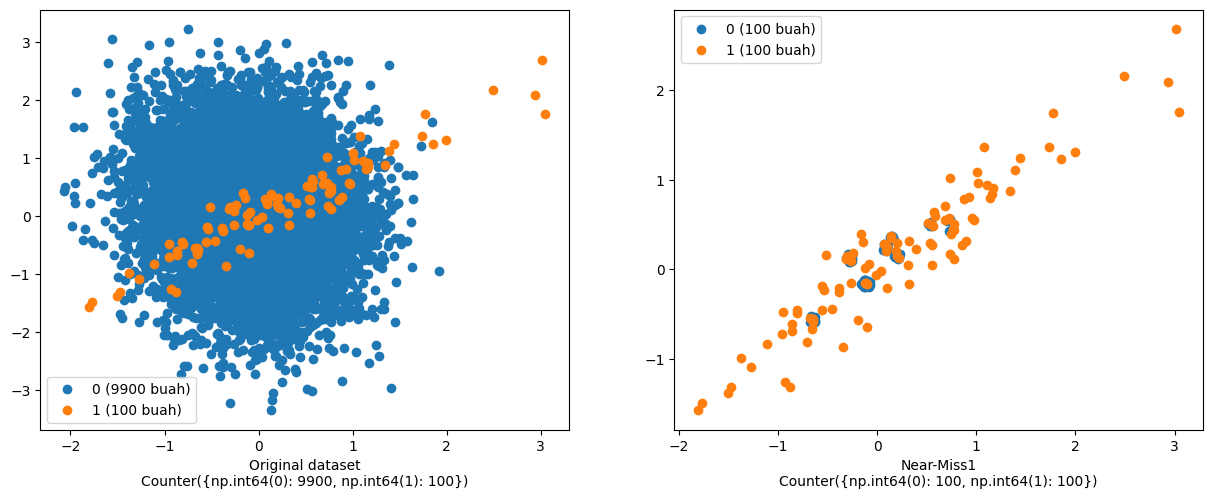

In [19]:
# Definisi Near Miss 1 class
nearmiss = NearMiss()

# Resampling berdasarkan dataset simulasi
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss1
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss,
                                  y1=y, y2=y_nearmiss,
                                  title2='Near-Miss1')

2. NearMiss-2

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terbesar ke tiga sampel kelas minoritas terdekat.

Counter({np.int64(0): 100, np.int64(1): 100})


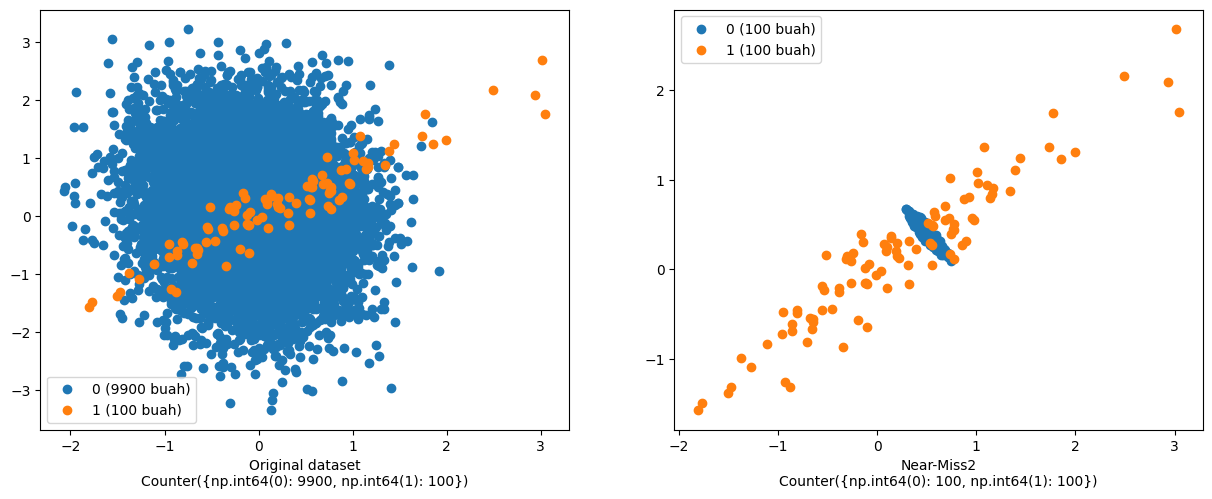

In [20]:
# Definisi Near Miss 2 class
nearmiss2 = NearMiss(version=2)

# Resampling berdasarkan dataset simulasi
X_nearmiss2, y_nearmiss2 = nearmiss2.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss2 = Counter(y_nearmiss2)
print(counter_y_nearmiss2)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss2
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss2,
                                  y1=y, y2=y_nearmiss2,
                                  title2='Near-Miss2')

3. NearMiss-3

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke setiap sampel kelas minoritas.

Counter({np.int64(0): 100, np.int64(1): 100})


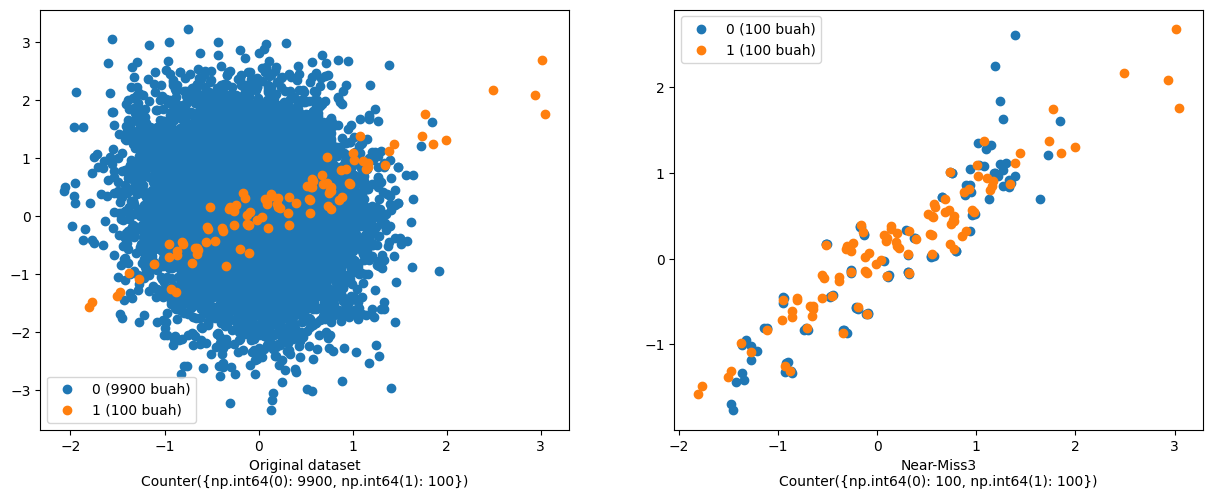

In [21]:
# Definisi Near Miss 3 class
nearmiss3 = NearMiss(version=3)

# Resampling berdasarkan dataset simulasi
X_nearmiss3, y_nearmiss3 = nearmiss3.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss3 = Counter(y_nearmiss3)
print(counter_y_nearmiss3)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss3
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss3,
                                  y1=y, y2=y_nearmiss3,
                                  title2='Near-Miss3')

#### Tomek Link Undersampling

Tomek Link Undersampling mengurangi sampel kelas mayoritas dengan cara mengidentifikasi dan menghapus *Tomek Link*. *Tomek Link* adalah pasangan sampel (*a* dan *b*) yang memenuhi tiga kriteria:

1. *b* adalah tetangga terdekat dari *a*,
2. *a* adalah tetangga terdekat dari *b*, dan
3. *a* serta *b* berasal dari kelas yang berbeda.

Sederhananya, ini adalah pasangan data dari kelas yang berlawanan yang saling menjadi tetangga terdekat.

![TomekLink](https://i.imgur.com/gZaHcPL.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.62*

Counter({np.int64(0): 9847, np.int64(1): 100})


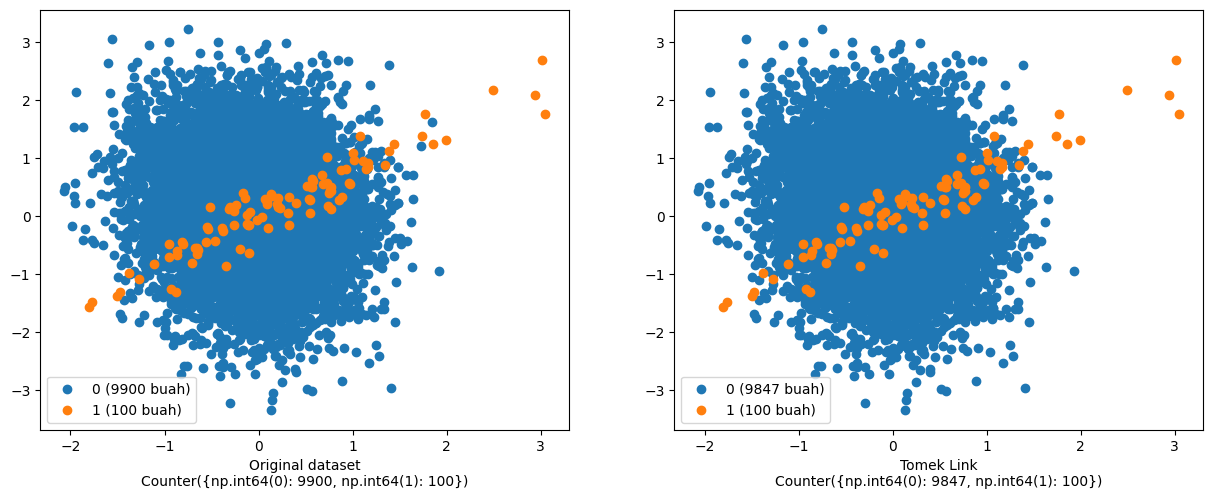

In [22]:
# Definisi Tomek Link class
tomek = TomekLinks()

# Resampling berdasarkan dataset simulasi
X_tomek, y_tomek = tomek.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_tomek = Counter(y_tomek)
print(counter_y_tomek)

# Perbandingan scatter plot antara dataset asli dan dataset Tomek Link
show_simulated_dataset_comparison(X1=X , X2=X_tomek,
                                  y1=y, y2=y_tomek,
                                  title2='Tomek Link')

Dari visualisasi di atas, tertulis bahwa data kelas mayoritas hanya berkurang dari 9900 menjadi 9851 (berkurang sebanyak 49 data saja). Tomek Link ini menghapus sedikit data mayoritas karena harus memenuhi ketiga kriteria tersebut.

## **Cost Sensitive Learning**

**Klasifikasi dengan Konsekuensi Nyata: Belajar dari Kasus Pinjaman Bank**  

Dalam dunia perbankan, keputusan pemberian pinjaman adalah contoh nyata bagaimana klasifikasi bisa berdampak besar. Bayangkan jika bank salah menolak nasabah yang sebenarnya layak (*False Negative*) – konsekuensinya relatif kecil, mungkin hanya mengecewakan calon debitur. Namun jika bank salah menyetujui nasabah yang tidak mampu membayar (*False Positive*), dampaknya bisa sangat merugikan karena berpotensi menimbulkan kerugian finansial besar. Inilah mengapa kita perlu pendekatan khusus yang disebut **Cost-Sensitive Learning**.

**Mengapa Cost-Sensitive Learning Penting?**  
- Setiap jenis kesalahan punya konsekuensi berbeda  
- Dalam kasus pinjaman:  
  - *False Positive* (salah setujui) = kerugian besar (cost tinggi)  
  - *False Negative* (salah tolak) = dampak kecil (cost rendah)  
- Berbeda dengan accuracy biasa yang menganggap semua kesalahan sama  

**Cara Kerja Cost-Sensitive Learning**  
Teknik ini memprioritaskan pengurangan kesalahan yang paling mahal dengan:  
✔ **Pemberian bobot berbeda**  
   - Contoh: Kelas minoritas (nasabah buruk) diberi bobot 99 vs kelas mayoritas (nasabah baik) bobot 1  
✔ **Algoritma khusus** yang secara eksplisit menghitung biaya kesalahan selama pelatihan  
✔ **Ensemble model** yang menggabungkan prediksi untuk meminimalkan total biaya  

**Mengapa ini bisa diimplementasikan untuk Imbalanced Dataset?**  
Dibanding sekadar menyeimbangkan data, pendekatan ini:  
- Lebih realistis karena menyesuaikan dengan dampak bisnis nyata  
- Memungkinkan model fokus pada kesalahan yang benar-benar mahal  
- Tetap mempertimbangkan ketidakseimbangan data melalui penyesuaian bobot  

Dengan strategi ini, bank bisa membuat keputusan yang lebih cerdas – bukan sekedar akurat secara statistik, tapi juga bijak secara finansial.

Kita akan menerapkan Cost Sensitive Algorithm pada Decision Tree untuk melakukan imbalanced classification.

### Cost Sensitive Decision Tree

Dengan model Decision Tree yang sudah dipelajari, kita akan mencoba algoritma *cost-sensitive*. Mari kita lihat dulu bagaimana kinerja Decision Tree biasa pada data *imbalanced* **tanpa memberikan bobot** khusus pada setiap kelas.

In [23]:
decision_tree = DecisionTreeClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9827
f1_macro score: 0.5389460604605365
precision_micro score: 0.9827
precision_macro score: 0.543854254759847
recall_micro score: 0.9827
recall_macro score: 0.5359090909090909


Selanjutnya, kita akan mengevaluasi Decision Tree dengan memberikan bobot yang berbeda untuk setiap kelas. Karena **kelas 0 memiliki 9900 sampel** dan **kelas 1 hanya 100 sampel**, kita akan mencoba memberikan **bobot yang berlawanan** dengan distribusinya:
- **kelas 0** diberi **bobot 100**
- **kelas 1** diberi **bobot 9900**

Penting untuk diingat bahwa bobot ini mungkin belum yang terbaik, karena bobot yang terlalu besar pada kelas minoritas bisa membuat model jadi terlalu fokus padanya.

In [24]:
weights = {0:100, 1:9900}

decision_tree = DecisionTreeClassifier(class_weight=weights)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9843
f1_macro score: 0.5638268275024348
precision_micro score: 0.9841999999999999
precision_macro score: 0.5771697108563713
recall_micro score: 0.9838999999999999
recall_macro score: 0.5563636363636364


Terlihat adanya perbedaan pada skor macro yang menunjukkan bahwa penerapan cost sensitive learning pada decision tree berhasil memperbaiki sedikit lebih baik
klasifikasi model tersebut.

# **Neural Network**

Neural Network (NN) adalah algoritma dalam machine learning yang meniru cara kerja neuron di otak manusia. Salah satu jenis Neural network yang populer untuk digunakan adalah **Multi Layer Perceptron (MLP)**. MLP ini terdiri dari **sejumlah perceptron yang disusun menjadi beberapa layer**, yang mana masing-masing perceptron tersebut memiliki peran tertentu.

![Multi Layer Perceptron](https://www.researchgate.net/publication/334609713/figure/fig1/AS:783455927406593@1563801857102/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single.jpg)

*Sumber: A Guide for Using Deep Learning for Complex Trait Genomic Prediction - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single_fig1_334609713*

**Arsitektur Dasar Multi-Layer Perceptron (MLP)**

MLP memiliki struktur berlapis yang terdiri dari tiga komponen utama:

1. **Input Layer (Lapisan Masukan)**:
- Berfungsi sebagai pintu masuk data ke dalam jaringan
- Jumlah neuronnya ditentukan oleh jumlah fitur dalam dataset
- Contoh: Dataset dengan 5 fitur akan memiliki 5 neuron input

2. **Hidden Layer (Lapisan Tersembunyi)**:
- Lapisan pemrosesan utama yang melakukan komputasi
- Menerima sinyal dari lapisan sebelumnya dan mentransformasikannya untuk diteruskan ke output layer atau hidden layer berikutnya
- Dapat terdiri dari satu atau beberapa lapisan dengan jumlah neuron bervariasi

3. **Output Layer (Lapisan Keluaran)**:
- Menghasilkan prediksi akhir model
- Untuk klasifikasi biner:
  * Biasanya menggunakan 1 neuron output
  * Fungsi aktivasi sigmoid menghasilkan nilai antara 0-1
  * Threshold 0.5 umum digunakan untuk menentukan kelas
    - ≥0.5: Kelas 1
    - <0.5: Kelas 0

Struktur ini memungkinkan MLP untuk mempelajari hubungan non-linear yang kompleks dalam data melalui kombinasi lapisan-lapisan tersebut. Fleksibilitas dalam menentukan jumlah hidden layer dan neuron membuat MLP dapat disesuaikan dengan berbagai jenis masalah machine learning.

**Komponen Utama Setiap Neuron pada Hidden Layer**

Pada hidden layer, setiap neuron memiliki dua komponen utama:

1. **Weight (Bobot)**: merupakan parameter yang dikalikan dengan input dari layer sebelumnya. Weight ini menunjukkan "kekuatan" atau pengaruh masing-masing input pada neuron, yang mana nilainya akan ditentukan dan dioptimalkan selama proses training untuk meminimalkan loss function menggunakan algoritma tertentu, misalnya backpropagation.
2. **Bias**: merupakan sebuah konstanta tambahan yang digunakan untuk menyesuaikan output masing-masing neuron agar lebih sesuai dengan output yang diinginkan.

Neuron merupakan fungsi didefinisikan sebagai

![Neuron](https://i.imgur.com/ytS5Xf7.png)

dengan:
- vektor **x** = (x1, x2, ..., xn) merupakan input,
- vektor **w** = (w1, w2, ..., wn) disebut dengan bobot atau weights,
- konstanta *b* disebut dengan bias, dan
- fungsi *f* disebut dengan fungsi aktivasi. Ada banyak fungsi aktivasi yang dapat digunakan seperti pada gambar dibawah ini:

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Berikutnya, kita akan membuat model klasifikasi *Multilayer Perceptron* (MLP) dengan dua lapisan tersembunyi. Lapisan pertama akan memiliki 30 neuron, dan lapisan kedua akan memiliki 10 neuron. Fungsi aktivasi yang akan digunakan adalah ReLU.

In [25]:
# Definisi MLPClassifier class
mlp_classifier = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(30,10),
    solver='adam',
    random_state=42,
    activation='relu'
)

In [26]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(mlp_classifier, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9902000000000001
f1_macro score: 0.5165850675366084
precision_micro score: 0.9902000000000001
precision_macro score: 0.6950990495247624
recall_micro score: 0.9902000000000001
recall_macro score: 0.51


Mungkin dengan dataset yang digunakan masih berupa severely imbalanced, didapatkan F1 Macro Score yang tidak terlalu bagus. Oleh karenanya, kita dapat lakukan penanganan imbalanced dataset seperti yang pada metode-metode pada bagian sebelumnya sekaligus menerapkan **pipeline** untuk menggabungkan langkah-langkah tersebut.

## **Pipeline**

Dalam *machine learning*, *pipeline* adalah urutan tahapan yang terstruktur untuk mengolah data dan membangun model. Tahapan ini bisa mencakup pre-processing seperti **imputasi** null values, **normalisasi** atau standarisasi fitur (seperti StandardScaler), dan **encoding**, serta proses lainnya. *Pipeline* membantu mengotomatisasi alur kerja, menjaga konsistensi, dan memastikan hasil dapat diulang.

![Pipeline](https://miro.medium.com/v2/resize:fit:4800/format:webp/0*mEO_PWFmOG_POqpf.png)

*Sumber: [Scikit-learn Pipelines Explained: Streamline and Optimize Your Machine Learning Processes](https://medium.com/@sahin.samia/scikit-learn-pipelines-explained-streamline-and-optimize-your-machine-learning-processes-f17b1beb86a4)*

Dalam imbalanced classification, *pipeline* juga dapat digunakan untuk menerapkan teknik *resampling* pada dataset. Contoh berikut akan menunjukkan cara melakukan *oversampling* dan kemudian membangun model MLPClassifier untuk melakukan klasifikasi menggunakan *pipeline* yang disediakan oleh library `imblearn.pipeline`.

In [27]:
# Membuat pipeline
steps = [('over', SVMSMOTE()), ('model', mlp_classifier)]
pipeline = Pipeline(steps=steps)

In [28]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9148
f1_macro score: 0.5295761467374198
precision_micro score: 0.915
precision_macro score: 0.5263035854298703
recall_micro score: 0.9160999999999999
recall_macro score: 0.6975252525252525


Bisa dilihat bahwa skor f1 macro nya naik lebih sedikit dari yang sebelumnya. Ini artinya proses oversampling berhasil dilakukan sebelum melakukan training pada model MLPClassifier, dan hasilnya lebih bagus daripada MLPClassifier yang digunakan pada dataset original.

# **Soal**

## **A. Soal Latihan**

Jawablah 5 soal latihan berikut dengan menuliskan tahapan kode pada *cell* yang tersedia, dan tampilkan hasil akhir jawaban Anda menggunakan fungsi `print()` (selain soal 3).

### 1. **SMOTE Data Points**

Diberikan $x_1(2,4)$ dan $x_2(4,2)$ yang merupakan dua instances yang bertetangga dekat pada kelas minoritas. Jika kita menerapkan teknik SMOTE di antara kedua titik ini, pada interval berapa data baru tersebut mungkin dihasilkan? Lalu tampilkan contoh lima data baru tersebut! (hint: boleh gunakan NumPy)

In [29]:
# TODO: Masukkan variabel yang sesuai
x1 = np.array([2, 4])
x2 = np.array([4, 2])

# TODO: Operasikan hasil perhitungannya
titik_minimum = np.minimum(x1, x2)
titik_maksimum = np.maximum(x1, x2)

# Hitung vektor selisih antara x2 dan x1
vektor_selisih = x2 - x1

print(f"Data sintesis dapat dihasilkan dari range {titik_minimum} hingga {titik_maksimum}")

# TODO: Operasikan hasil perhitungan untuk 5 data sintesis
print("Lima data sintesis yang dapat dihasilkan dari SMOTE kedua data points tersebut:")
for i in range(5):
    alpha = np.random.rand()
    data_sintesis = x1 + alpha * vektor_selisih
    print(f"- {data_sintesis}")

Data sintesis dapat dihasilkan dari range [2 2] hingga [4 4]
Lima data sintesis yang dapat dihasilkan dari SMOTE kedua data points tersebut:
- [3.38943486 2.61056514]
- [3.56940229 2.43059771]
- [3.39171718 2.60828282]
- [2.67111908 3.32888092]
- [2.12862879 3.87137121]


### 2. **Cost Sensitive Learning**

Diberikan sebuah dataset dengan 100,000 sampel yang terbagi ke dalam tiga kelas sebagai berikut:

* Kelas A: 60,000 sampel
* Kelas B: 30,000 sampel
* Kelas C: 10,000 sampel

Dalam konteks *cost-sensitive learning*, salah satu cara untuk menangani dataset yang tidak seimbang adalah dengan memberikan bobot yang berbanding terbalik dengan frekuensi kelas.

Dengan jumlah total sampel adalah 100,000 dan jumlah kelas adalah 3.
Hitunglah bobot untuk masing-masing kelas (A, B, dan C).


In [30]:
#TODO: Lakukan operasi perhitungan yang sesuia untuk didapatkan bobot hasil tiap kelas
sampel_kelas_A = 60000
sampel_kelas_B = 30000
sampel_kelas_C = 10000

total_samples = 100000
jumlah_kelas = 3

# Menghitung bobot
bobot_A = total_samples / (jumlah_kelas * sampel_kelas_A)
bobot_B = total_samples / (jumlah_kelas * sampel_kelas_B)
bobot_C = total_samples / (jumlah_kelas * sampel_kelas_C)

print(f"Bobot Kelas (A): {bobot_A}")
print(f"Bobot Kelas (B): {bobot_B}")
print(f"Bobot Kelas (C): {bobot_C}")

Bobot Kelas (A): 0.5555555555555556
Bobot Kelas (B): 1.1111111111111112
Bobot Kelas (C): 3.3333333333333335


### 3.  **Imbalanced Classification Model with ROC Curve Comparison**

Anda diminta melakukan klasifikasi pada imbalanced dataset berukuran 10000 yang terdiri dari 2 kelas: Kelas A sebanyak 99% dan Kelas B sebanyak 1%.

Ada 3 model yang perlu Anda buat, yang terdiri dari:
- Model logistic regression standar
- Model logistic regression dengan teknik oversampling SMOTE
- Model cost sensitive logistic regression, jika diberikan informasi bahwa cost untuk kasus false negative adalah 50 x cost untuk false positive.

Gunakan `random_state=42` pada model, `test_size=0.3` pada `train_test_split`, dan `stratify`. Lalu, lakukan analisis ketiga model yang Anda buat dengan membuat kurva dan membandingkan nilai ROC AUC-nya!

(*hint: Slide Imbalanced Classification KASDAD*)

In [31]:
#Define dataset
X_soal, y_soal = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

#ROC Curve function
def roc_curve_plot(y_test, y_pred_proba, title, model_name):
    # Hitung ROC curve dan AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Visualisasikan ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

In [32]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_soal, y_soal, test_size=0.3, random_state=42, stratify=y_soal)

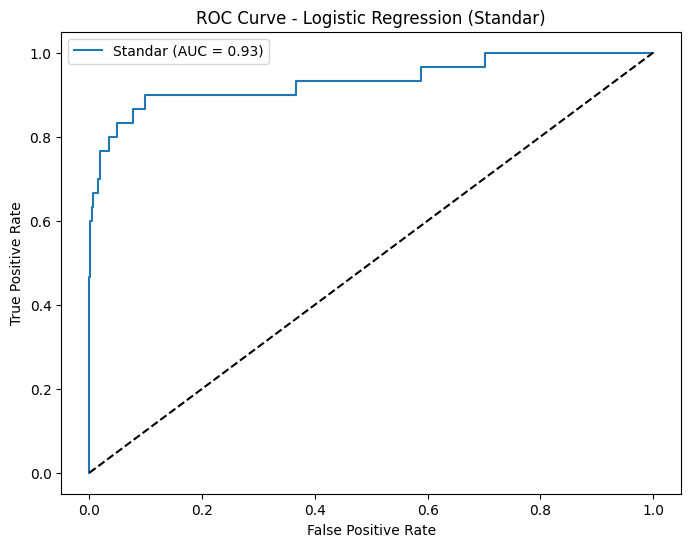

In [33]:
#TODO: Model standard
model_standard = LogisticRegression(random_state=42)
model_standard.fit(X_train, y_train)
y_pred_proba_standard = model_standard.predict_proba(X_test)[:, 1]
auc_std = roc_curve_plot(y_test, y_pred_proba_standard, 'ROC Curve - Logistic Regression (Standar)', 'Standar')

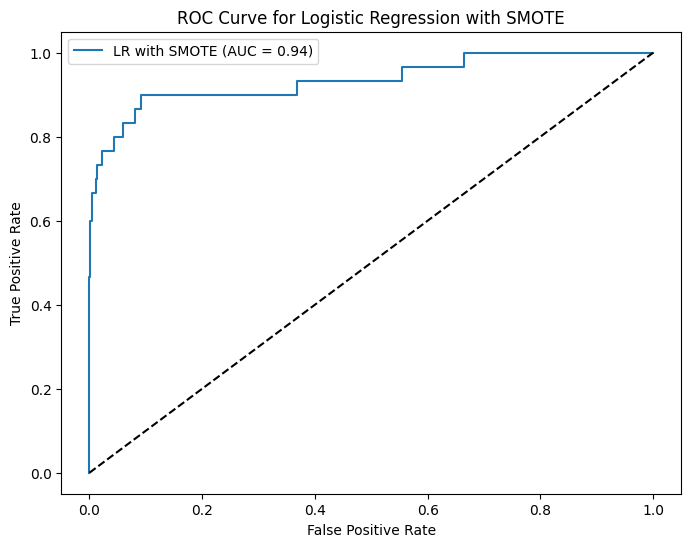

In [34]:
#TODO: Model with SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_proba_smote = model_smote.predict_proba(X_test)[:, 1]
roc_curve_plot(y_test, y_pred_proba_smote, 'ROC Curve for Logistic Regression with SMOTE', 'LR with SMOTE')

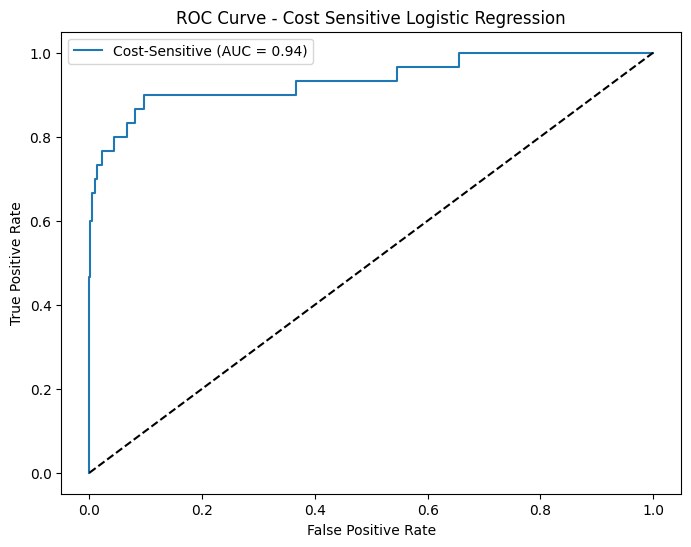

In [35]:
#TODO: Model with Cost Sensitive Learning
cost_weights = {0: 1, 1: 50}
model_cost = LogisticRegression(random_state=42, class_weight=cost_weights)
model_cost.fit(X_train, y_train)
y_pred_proba_cost = model_cost.predict_proba(X_test)[:, 1]
auc_cost = roc_curve_plot(y_test, y_pred_proba_cost, 'ROC Curve - Cost Sensitive Logistic Regression', 'Cost-Sensitive')

Jawaban Anda:

Model Standar:
- Kelebihan:
  - Memiliki hasil baseline yang merupakan performa model tanpa penanganan ketidakseimbangan kelas.
  - Biasanya berakurasi tinggi, tetapi recall untuk kelas minoritas rendah, karena model cenderung memilih kelas mayoritas.
- Kekurangan
  - Mengabaikan kelas minoritas berdasarkan true negative dan false negative yang tinggi.
  - Tidak cocok untuk klasifikasi model yang tidak seimbang.

Model SMOTE:
- Kelebihan:
  - Hasil recall dan precision lebih baik untuk kelas minoritas
  - SMOTE menambah data minoritas untuk mengurangi bias.
- Kekurangan
  - Menyebabkan overfitting terutama jika model kompleks.
  - Data sintetik tidak selalu mencerminkan distribusi asli dengan akurat.

Model Cost-Sensitive:
- Kelebihan:
  - Memperhitungkan biaya keasalahan klasifikasi, sehingga model lebih sensitif terhadap prediksi kelas minoritas.
  - Tidak mengubah data, tapi menyesuaikan bobot pada fungsi kerugian.
- Kekurangan
  - Perlu penyesuaian yang tepat terhadap class weight untuk hasil optimal.

### 4.  **Neural Networks Feed Forwarding**

Jalankan *Feed Forwarding* untuk mencari $a_1^{(2)}$ berdasarkan struktur *Multi Layer Perceptron* pada gambar berikut!

![MLP](https://i.imgur.com/4W6qbds.png)

Pertama, isi terlebih dahulu variabel yang bersesuaian pada struktur MLP pada gambar tersebut. Selanjutnya, lakukan operasi antar variabel tersebut sehingga didapatkan hasil untuk mencari $a_1^{(2)}$.

(*hint: Slide Neural Networks KASDAD*)

In [36]:
def relu(x):
    # TODO: Implementasikan fungsi ReLU di sini
    return max(0,x)

f = relu

# TODO: Isi variabel layer 1 yang bersesuaian
x1 = 3
x2 = 2
w11_1 = 0.4
w21_1 = 0.3
w12_1 = -0.5
w22_1 = 0.2
b1_1 = 0.1


# TODO: Lakukan operasi perhitungan antar variabel di atas untuk dapatkan a1_2!
x = np.array([x1, x2])

W1 = np.array([[w11_1, w12_1],
               [w21_1, w22_1]])

b1 = np.array([b1_1])

delta1_3 = 0.4
delta2_3 = 0.2

# Layer 1
z1 = np.dot(W1.T, x) + b1
a1 = np.array([relu(z1[0]), relu(z1[1])])

# Layer 2
a1_2 = a1[0]

print("Hasil a1_2 adalah:", a1_2)

Hasil a1_2 adalah: 1.9000000000000004


### 5.  **Neural Network Back Propagation**

Jalankan *Back Propagation* untuk mencari $\delta_1^{(2)}$ berdasarkan struktur *Multi Layer Perceptron* pada gambar berikut! Lalu, berapakah nilai $w_{11}^{(1)}$ pada iterasi berikutnya jika `learning rate = 0.1`

![MLP](https://i.imgur.com/uwA2PUj.png)

Lanjutkan pengisian variabel pada layer 2, untuk variabel pada layer 1 dapat gunakan kembali dari cell kode soal 4. Setelah itu, lakukan *Back Propagation* untuk mencari $\delta_1^{(2)}$ dan $w_{11}^{(1)}$!

(*hint: Slide Neural Networks KASDAD*)

In [37]:
#TODO
def relu_derivative(x):
    # TODO: Implementasikan fungsi ReLU di sini
    return np.arctan([x])

# TODO: Isi variabel layer 2 yang bersesuaian
learning_rate = 0.1
w11_2 = 0.6
w21_2 = 0.7
delta1_3 = 0.4
delta2_3 = 0.2

# TODO: Lakukan operasi perhitungan antar variabel yang sudah ada untuk mendapatkan delta1_2 dan update w11_1!
W2 = np.array([[w11_2], [w21_2]])
delta_3 = np.array([delta1_3, delta2_3])

delta1_2 = (w11_2*delta1_3 + w21_2*delta2_3)*relu_derivative(a1[0])
w11_1 -= learning_rate*delta1_2*x1

print("Hasil delta1_2 adalah:", delta1_2)

print("Hasil w11_1 pada iterasi berikutnya adalah:", w11_1)

Hasil delta1_2 adalah: [0.41280099]
Hasil w11_1 pada iterasi berikutnya adalah: [0.2761597]


## **B. Soal Dataset**

### Deskripsi Dataset

Dataset yang dipakai pada lab ini adalah dataset [Loan Approval](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data) dengan beberapa modifikasi.

Dataset ini berisi informasi mengenai aplikasi pinjaman dan status persetujuan pinjaman. Tujuan dataset ini adalah untuk memprediksi apakah pinjaman akan disetujui atau ditolak berdasarkan berbagai faktor.

**Penjelasan Kolom:**

* `person_age`: Usia peminjam (Float)
* `person_gender`: Jenis kelamin peminjam (Kategorikal)
* `person_education`: Tingkat pendidikan tertinggi peminjam (Kategorikal)
* `person_income`: Pendapatan tahunan peminjam (Float)
* `person_emp_exp`: Pengalaman kerja peminjam dalam tahun (Integer)
* `person_home_ownership`: Status kepemilikan rumah peminjam (misalnya, sewa, milik sendiri, hipotek) (Kategorikal)
* `loan_amnt`: Jumlah pinjaman yang diajukan (Float)
* `loan_intent`: Tujuan pinjaman (Kategorikal)
* `loan_int_rate`: Tingkat suku bunga pinjaman (Float)
* `loan_percent_income`: Jumlah pinjaman sebagai persentase dari pendapatan tahunan (Float)
* `cb_person_cred_hist_length`: Lama riwayat kredit peminjam dalam tahun (Float)
* `credit_score`: Skor kredit peminjam (Integer)
* `previous_loan_defaults_on_file`: Indikator riwayat gagal bayar pinjaman sebelumnya (Kategorikal)
* `loan_status (target variable)`: Status persetujuan pinjaman: 1 = disetujui; 0 = ditolak (Integer)

Target variable dataset ini adalah `loan_status`.

In [38]:
def show_simulated_dataset(X, y, title='Dataset Visualization',
                           feature_x="1", feature_y="2"):
    counter_y = Counter(y)
    plt.figure(figsize=(12, 10))

    majority_label = max(counter_y, key=counter_y.get)
    minority_label = min(counter_y, key=counter_y.get)

    fixed_colors = {0: 'red', 1: 'blue'}

    labels = {}
    for lbl, cnt in counter_y.items():
        role = 'Majority' if lbl == majority_label else 'Minority'
        labels[lbl] = f'{role} (Class {lbl}: {cnt})'

    for lbl in counter_y:
        idx = where(y == lbl)[0]
        plt.scatter(X[idx, 0], X[idx, 1],
                    label=labels[lbl],
                    color=fixed_colors.get(lbl, 'gray'),
                    alpha=0.6)

    plt.title(title)
    plt.xlabel('Feature: ' + feature_x)
    plt.ylabel('Feature: ' + feature_y)
    plt.legend(title='Class Distribution', loc='upper right')
    plt.show()


In [39]:
df_loan = pd.read_csv("loan.csv")

In [40]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      10500 non-null  float64
 1   person_gender                   10500 non-null  object 
 2   person_education                10500 non-null  object 
 3   person_income                   10500 non-null  float64
 4   person_emp_exp                  10500 non-null  int64  
 5   person_home_ownership           10500 non-null  object 
 6   loan_amnt                       10500 non-null  float64
 7   loan_intent                     10500 non-null  object 
 8   loan_int_rate                   10500 non-null  float64
 9   loan_percent_income             10500 non-null  float64
 10  cb_person_cred_hist_length      10500 non-null  float64
 11  credit_score                    10500 non-null  int64  
 12  previous_loan_defaults_on_file  

In [41]:
df_loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,28.0,male,Associate,72926.0,2,MORTGAGE,16800.0,DEBTCONSOLIDATION,12.61,0.23,7.0,586,Yes,0
1,23.0,female,Associate,72988.0,0,MORTGAGE,4500.0,MEDICAL,7.40,0.06,3.0,562,Yes,0
2,22.0,male,Associate,78823.0,0,MORTGAGE,4000.0,DEBTCONSOLIDATION,7.14,0.05,4.0,624,Yes,0
3,23.0,male,Bachelor,79971.0,0,RENT,12000.0,VENTURE,11.01,0.15,4.0,671,No,0
4,28.0,female,High School,80906.0,5,RENT,16000.0,VENTURE,12.18,0.20,6.0,642,Yes,0


### **6. Data Preprocessing & Preparation**

#### a) Hitung dan tampilkan jumlah sampel kelas mayoritas dan minoritas pada dataset berdasarkan fitur target pada soal.

In [42]:
# TODO: Tampilkan jumlah setiap kelas pada fitur target

# Hitung jumlah sampel per kelas pada kolom target 'loan_status'
class_counts = df_loan['loan_status'].value_counts()

# Tampilkan hasil
print("Jumlah sampel per kelas:")
print(class_counts)

# Identifikasi mayoritas dan minoritas
mayoritas = class_counts.idxmax()
minoritas = class_counts.idxmin()

print(f"\nKelas mayoritas: {mayoritas} (jumlah: {class_counts[mayoritas]})")
print(f"Kelas minoritas: {minoritas} (jumlah: {class_counts[minoritas]})")

Jumlah sampel per kelas:
loan_status
1    10000
0      500
Name: count, dtype: int64

Kelas mayoritas: 1 (jumlah: 10000)
Kelas minoritas: 0 (jumlah: 500)


Jalankan kode berikut untuk membuat dataset baru dengan kolom `loan_percent_income` dan kolom `credit_score` sebagai fitur-fiturnya (`X_df`) dan kolom `loan_status` sebagai target (`y_df`).

In [43]:
feature_x = 'loan_percent_income'
feature_y = 'credit_score'

X_df = df_loan[[feature_x, feature_y]].to_numpy()
y_df = df_loan['loan_status'].to_numpy()

counter = Counter(y_df)
print(counter)

Counter({np.int64(1): 10000, np.int64(0): 500})


#### b) Visualisasikan dataset baru yang telah dibuat dengan fungsi scatter plot yang telah dibuat

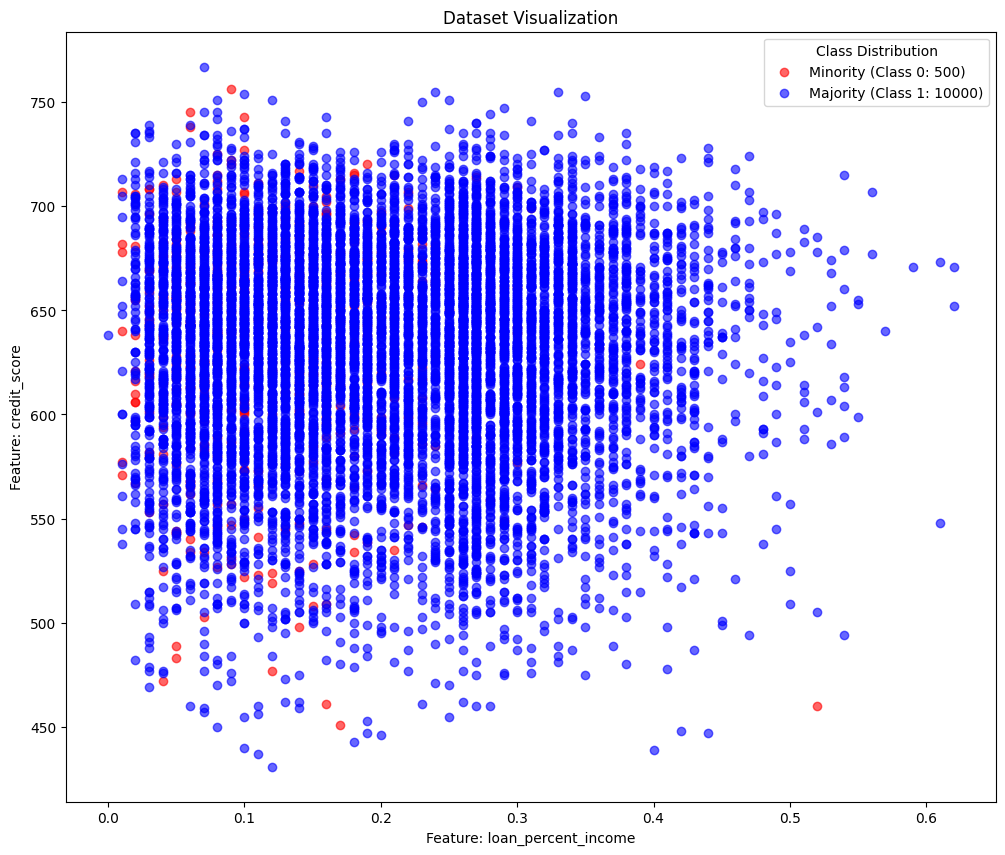

In [44]:
# TODO: Visualisasikan dataset
show_simulated_dataset(X_df, y_df, title='Dataset Visualization',
                       feature_x=feature_x, feature_y=feature_y)

#### c) Jelaskan konteks imbalanced pada dataset ini, manakah kelas minoritas dan mayoritas? Apa pengaruhnya bentuk imbalanced ini terhadap classification di tahap selanjutnnya untuk konteks Credit Risk Analysis & Loan Approval?

Jawaban Anda:

Dataset ini sangat tidak seimbang dengan kelas mayoritas (loan disetujui) sebanyak 10.000 sampel dan kelas minoritas (loan ditolak) hanya 500 sampel. Ketidakseimbangan ini menyebabkan model cenderung bias ke kelas mayoritas, menghasilkan akurasi tinggi namun performa buruk dalam mendeteksi kelas minoritas yang penting untuk menghindari risiko kredit. Oleh karena itu, metrik seperti F1-score, precision, dan recall yang menilai keseimbangan performa antar kelas lebih relevan daripada akurasi. Untuk mengatasi masalah ini, teknik seperti oversampling, undersampling, dan penggunaan metrik evaluasi yang adil (misal F1-macro) sangat disarankan agar model dapat mengenali risiko dengan lebih akurat dan mendukung keputusan kredit yang lebih tepat.

#### d) Lengkapilah fungsi di bawah ini untuk melakukan oversampling pada setiap fold ketika melakukan cross validation pada suatu model menggunakan StratifiedKFold dengan k=5, shuffle=True, dan random_state=42. Tampilkan juga rata-rata skor accuracy, f1 macro, precision macro, dan recall macro.

Jalankan fungsi tersebut dengan menggunakan:
- DecisionTreeClassifier, dengan random_state=42
- Teknik oversampling RandomOversampler, dengan random_state=42
- X dan y yang didefinisikan pada soal (6a)

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

In [45]:
def train_and_evaluate_with_sampling(model, X, y, resample_method):
    # TODO: Gunakan StratifiedK-fold biasa (Ubah None menjadi jawaban)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # TODO: Simpan hasil skor metrik setiap iterasi pada sebuah list
    accuracies = []
    f1_scores = []
    precisions = []
    recalls = []

    # Iterasi untuk membagi fold mana yang menjadi training dan validation test dataset
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]


        # TODO: Lakukan fit resample dari menggunakan variabel resample_method di parameter method ini (Ubah None menjadi jawaban)
        X_train_sampled, y_train_sampled = resample_method.fit_resample(X_train, y_train)

        model_clone = clone(model) # Cloning model untuk membuat model harus dilatih lagi untuk memprediksi di luar method ini

        # TODO: Lakukan fitting model dari hasil clone model dengan X dan y dataset yang sudah diresample
        model_clone.fit(X_train_sampled, y_train_sampled)

        # TODO: Prediksi kelas kategori menggunakan model yang telah dilatih di atas dengan menggunakan validation test dataset (Ubah None menjadi jawaban)
        y_pred = model_clone.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        precision = precision_score(y_test, y_pred, average="macro")
        recall = recall_score(y_test, y_pred, average="macro")

        # TODO: Tambahkan hasil skor metrik ke dalam list yang bersesuaian
        accuracies.append(accuracy)
        f1_scores.append(f1)
        precisions.append(precision)
        recalls.append(recall)

    # TODO: Hitung dan tampilkan mean dari setiap list skor metrik
    # Notes: ganti None dengan nama variabel list masing - masing metrik

    print("Mean scores across all folds:")
    print(f'Mean Accuracy: {np.mean(accuracies)}')
    print(f'Mean F1-score (macro): {np.mean(f1_scores)}')
    print(f'Mean Precision (macro): {np.mean(precisions)}')
    print(f'Mean Recall (macro): {np.mean(recalls)}')

Setelah kode di atas telah diisi, uncomment & jalankan kode ini!

In [46]:
dec_tree = DecisionTreeClassifier(random_state=42)
rand_oversampler =  RandomOverSampler(random_state=42)

train_and_evaluate_with_sampling(dec_tree, X_df, y_df, rand_oversampler)

Mean scores across all folds:
Mean Accuracy: 0.8826666666666666
Mean F1-score (macro): 0.5221352921687592
Mean Precision (macro): 0.5200111055968557
Mean Recall (macro): 0.5337


#### e) Setelah menjalani kode pada soal 6a, uncomment & jalankan kode di bawah ini! Apakah terdapat perbedaan skor dengan yang ada pada soal (6e)? Jika berbeda, mengapa hal tersebut bisa terjadi, dan approach manakah yang lebih tepat untuk dilakukan (approach (6d) atau (6e))?

In [47]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_oversampled, y_oversampled = RandomOverSampler(random_state=42).fit_resample(X_df, y_df)

scoring = ['accuracy','f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(DecisionTreeClassifier(random_state=42), X_oversampled, y_oversampled, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.9481000000000002
f1_macro score: 0.9479572820816152
precision_macro score: 0.95300464839475
recall_macro score: 0.9481000000000002


Jawaban Anda:

Perbedaan skor signifikan antara dua pendekatan oversampling dalam cross-validation disebabkan oleh data leakage. Pada pendekatan 6e, oversampling dilakukan sebelum cross-validation sehingga sampel sintetis muncul di data pelatihan dan validasi, membuat model "melihat" pola yang sama di kedua set dan menghasilkan skor yang terlalu optimis (bias tinggi). Sebaliknya, pendekatan 6d melakukan oversampling hanya pada data pelatihan di setiap fold, menjaga data validasi tetap asli dan independen, sehingga evaluasi lebih realistis dan dapat dipercaya. Pendekatan 6d mencegah data leakage, memberikan generalisasi yang lebih baik, dan menghasilkan metrik performa yang jujur meskipun skor F1 lebih rendah. Oleh karena itu, oversampling harus dilakukan dalam proses cross-validation, bukan sebelum, untuk menghindari bias dan overfitting serta memastikan validitas evaluasi model.

> Setelah mengetahui perbedaan approach pada 6d dan 6e, mungkin Anda bisa memeriksa kembali bagian **A. Soal Latihan [40]** pada **Soal Nomor 3**. (hint: urutan oversampling dan `train_test_split`)

### **7. Oversampling**

#### a) Buat dua metode oversampling yang telah dipelajari pada lab ini. Lalu bandingkan hasil resampling datasetnya menggunakan scatter plot! Jelaskan perbedaan yang terjadi dari kedua metode oversampling yang Anda pilih!

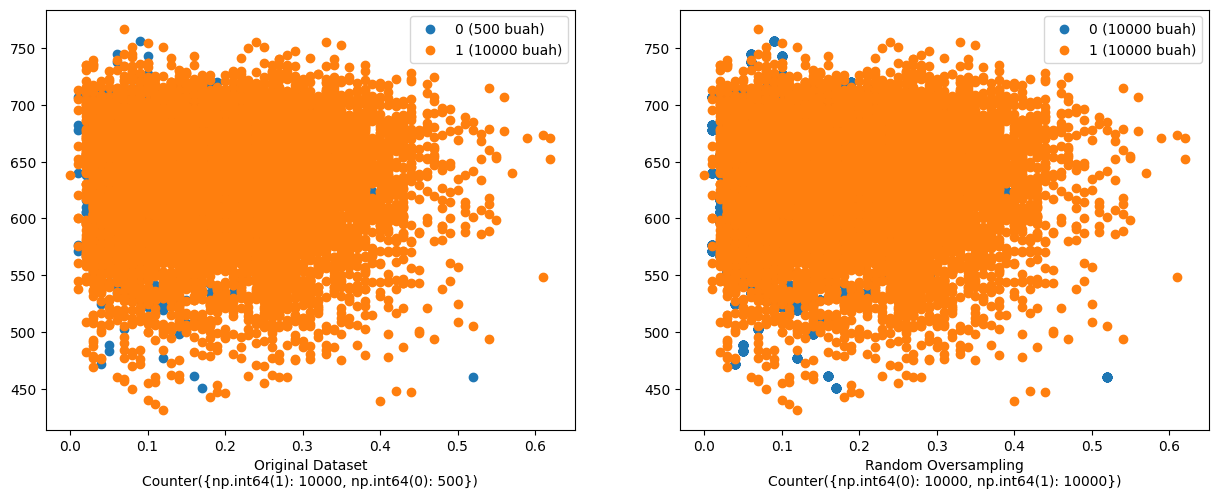

In [48]:
# TODO: Oversampling dataset dengan metode pertama
# Random Oversampling

from imblearn.over_sampling import RandomOverSampler

# Oversampling dengan RandomOverSampler
rand_over = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_rand_over, y_rand_over = rand_over.fit_resample(X_df, y_df)

# Plot hasil
show_simulated_dataset_comparison(
    X1=X_df, X2=X_rand_over,
    y1=y_df, y2=y_rand_over,
    title1='Original Dataset',
    title2='Random Oversampling'
)

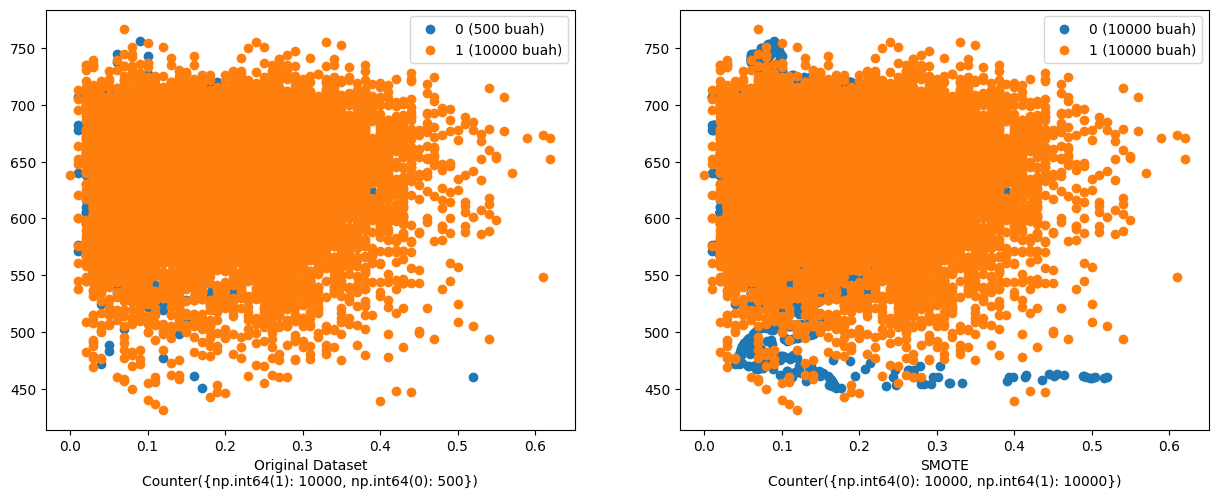

In [49]:
# TODO: Oversampling dataset dengan metode kedua
# SMOTE (Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_df, y_df)

# Plot hasil
show_simulated_dataset_comparison(
    X1=X_df, X2=X_smote,
    y1=y_df, y2=y_smote,
    title1='Original Dataset',
    title2='SMOTE'
)

Jawaban Anda:

Random Oversampling hanya menggandakan sampel dari kelas minoritas secara acak tanpa menambahkan informasi baru. Hal ini bisa menyebabkan overfitting karena model akan belajar dari sampel yang sama berulang kali.

SMOTE menciptakan data sintetik dengan menginterpolasi antara sampel minoritas yang berdekatan. Ini menghasilkan distribusi data minoritas yang lebih bervariasi dan realistis, sehingga lebih membantu dalam proses pembelajaran model.

Scatter plot SMOTE menunjukkan data minoritas tersebar lebih halus, sedangkan Random Oversampling hanya menunjukkan titik-titik yang sama digandakan.

#### b) Lakukan cross validation dari kedua metode berbeda pada soal 7a dengan menggunakan `StratifiedKFold` dengan k=5 pada 2 buah model Decision Tree (`random_state=42`). Pastikan Oversampling dilakukan pada setiap fold cross validation!

(hint: bisa gunakan function yang telah di-define)

In [50]:
# TODO: Cross validation metode pertama
# Random Oversampling
rand_over = RandomOverSampler(random_state=42)
train_and_evaluate_with_sampling(
    DecisionTreeClassifier(random_state=42),
    X_df, y_df, rand_over
)

Mean scores across all folds:
Mean Accuracy: 0.8826666666666666
Mean F1-score (macro): 0.5221352921687592
Mean Precision (macro): 0.5200111055968557
Mean Recall (macro): 0.5337


In [51]:
# TODO: Cross validation metode kedua
# SMOTE
smote = SMOTE()
train_and_evaluate_with_sampling(
    DecisionTreeClassifier(random_state=42),
    X_df, y_df, smote
)

Mean scores across all folds:
Mean Accuracy: 0.9119047619047619
Mean F1-score (macro): 0.527547924134784
Mean Precision (macro): 0.5271627130491277
Mean Recall (macro): 0.5281500000000001


#### c)  Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.

Jawaban Anda:

Metode **SMOTE** memberikan skor F1 makro tertinggi (~0.5264) dibandingkan **Random Oversampling** (~0.5221) karena SMOTE tidak hanya menggandakan sampel minoritas, tetapi juga membuat sampel sintetis baru melalui interpolasi antar sampel minoritas yang berdekatan. Hal ini membantu model memahami batas keputusan kelas minoritas dengan lebih baik dan mengurangi risiko overfitting yang sering terjadi pada Random Oversampling akibat duplikasi data yang sama. SMOTE menghasilkan variasi data yang lebih alami sehingga model dapat belajar pola yang lebih general, sementara Random Oversampling cenderung membuat model terlalu spesifik pada sampel minoritas yang diduplikasi. Meskipun perbedaan skor tidak besar, SMOTE menunjukkan performa lebih seimbang antara precision dan recall, membuatnya lebih efektif untuk menangani ketidakseimbangan kelas pada dataset ini.

### **8. Undersampling**

#### a) Buat dua metode undersampling yang telah dipelajari pada lab ini. Lalu bandingkan hasil resampling datasetnya menggunakan scatter plot! Jelaskan perbedaan yang terjadi dari kedua metode undersampling yang Anda pilih!

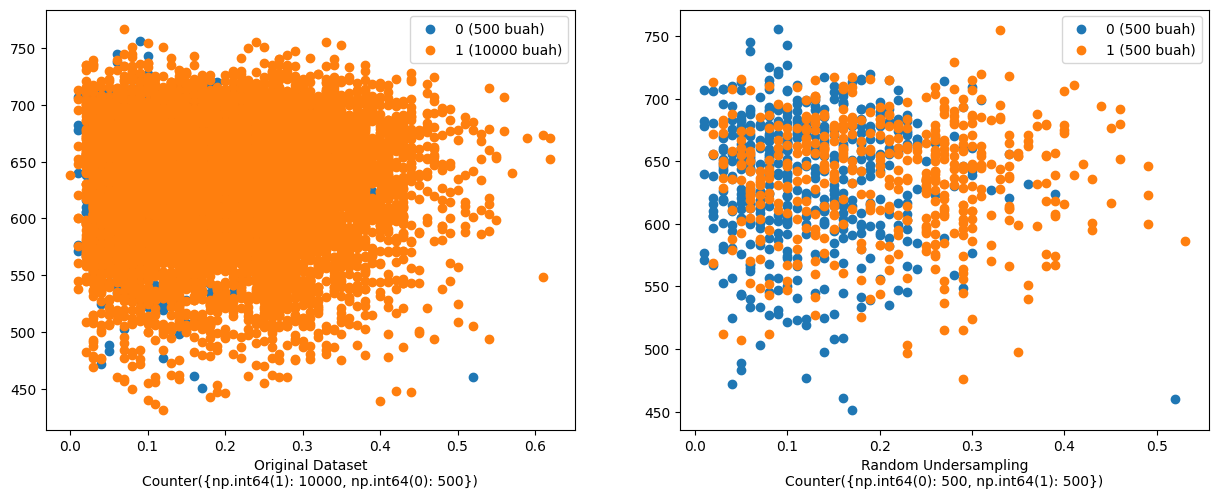

In [52]:
# TODO: Undersampling dataset dengan metode pertama
# Random Undersampling

from imblearn.under_sampling import RandomUnderSampler

# Undersampling dengan RandomUnderSampler
rand_under = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_rand_under, y_rand_under = rand_under.fit_resample(X_df, y_df)

# Plot hasil
show_simulated_dataset_comparison(
    X1=X_df, X2=X_rand_under,
    y1=y_df, y2=y_rand_under,
    title1='Original Dataset',
    title2='Random Undersampling'
)

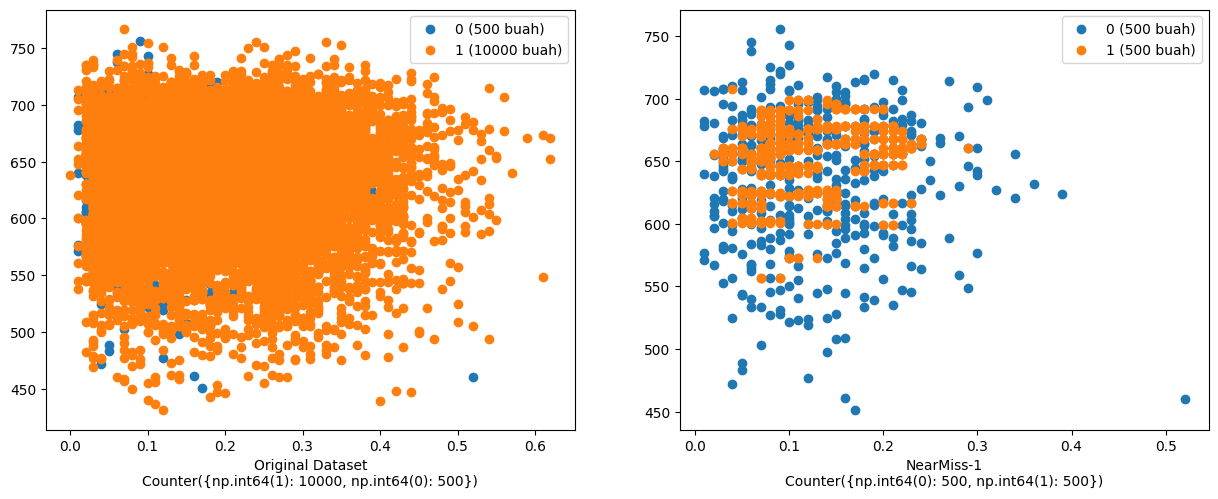

In [53]:
# TODO: Undersampling dataset dengan metode kedua
# NearMiss-1
from imblearn.under_sampling import NearMiss

# Undersampling dengan NearMiss-1
nearmiss = NearMiss(version=1)
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_df, y_df)

# Plot hasil
show_simulated_dataset_comparison(
    X1=X_df, X2=X_nearmiss,
    y1=y_df, y2=y_nearmiss,
    title1='Original Dataset',
    title2='NearMiss-1'
)

Jawaban Anda:

Random Undersampling mengurangi sampel kelas mayoritas secara acak, sederhana dan cepat, namun berisiko menghilangkan data penting dari kelas mayoritas.

NearMiss-1 memilih sampel mayoritas yang paling dekat dengan kelas minoritas, sehingga lebih menjaga konteks batas antar kelas dan informasi penting, tapi prosesnya lebih kompleks dan bisa mengorbankan gambaran global data.

Random Undersampling cenderung kehilangan informasi secara acak, sedangkan NearMiss-1 berfokus mempertahankan sampel informatif di sekitar minoritas, meski berpotensi mempertahankan noise jika minoritas mengandung outlier.

#### b) Lakukan cross validation dari kedua metode berbeda pada soal 8a dengan menggunakan `StratifiedKFold` dengan k=5 pada 2 buah model Decision Tree (`random_state=42`). Pastikan Undersampling dilakukan pada setiap fold cross validation!

(hint: bisa gunakan function yang telah di-define)

In [54]:
# TODO: Cross validation metode pertama
# Random Undersampling
rand_under = RandomUnderSampler(random_state=42)
train_and_evaluate_with_sampling(
    DecisionTreeClassifier(random_state=42),
    X_df, y_df, rand_under
)

Mean scores across all folds:
Mean Accuracy: 0.5833333333333334
Mean F1-score (macro): 0.4218065389826891
Mean Precision (macro): 0.5148381744630728
Mean Recall (macro): 0.5798500000000001


In [55]:
# TODO: Cross validation metode kedua
# NearMiss-1
nearmiss = NearMiss(version=1)
train_and_evaluate_with_sampling(
    DecisionTreeClassifier(random_state=42),
    X_df, y_df, nearmiss
)

Mean scores across all folds:
Mean Accuracy: 0.16095238095238096
Mean F1-score (macro): 0.15454945819780389
Mean Precision (macro): 0.4851685091057302
Mean Recall (macro): 0.46259999999999996


#### c)  Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.

Jawaban Anda:

Metode yang memberikan skor F1 makro tertinggi adalah Random Undersampling dengan skor sekitar 0.4218, jauh lebih baik dibandingkan NearMiss-1 yang hanya sekitar 0.1545. Hal ini terjadi karena Random Undersampling menghapus sampel kelas mayoritas secara acak sehingga masih mempertahankan variasi dan distribusi data yang lebih alami, memungkinkan model untuk belajar pola yang lebih representatif. Sebaliknya, NearMiss-1 memilih sampel mayoritas yang paling dekat dengan kelas minoritas, yang sering kali menghilangkan informasi penting dari kelas mayoritas dan menyebabkan model kehilangan kemampuan generalisasi, sehingga performa menurun drastis. Selain itu, NearMiss-1 cenderung membuat model overfit pada titik-titik tertentu di batas kelas minoritas dan gagal menangkap pola global, yang berdampak pada recall dan akurasi rendah. Dengan demikian, Random Undersampling lebih efektif dalam menjaga keseimbangan antara akurasi dan F1-score pada dataset yang tidak seimbang.

### **9. Cost-Sensitive Learning**

#### a) Buatlah beberapa model decision tree dengan random_state=42 yang menerima dataset pada soal (6a) dan dengan weight yang berbeda, yaiu:
- tanpa bobot
- bobot 2 kali lebih besar untuk kelas minoritas
- bobot 20 kali lebih besar untuk kelas minoritas

Lakukan `train_test_split` dengan ketentuan berikut:
- menggunakan `X_df` dan `y_df` dari soal (6a)
- stratify=y
- random_state=42
- test_size=0.3

Lakukan fit predict pada model dengan weights yang berbeda, kemudian tampilkan skor f1 macro dan juga confusion matrix untuk masing-masing model DT dengan weights yang berbeda tersebut. Confusion matrix yang tidak diberi label akan mendapat pengurangan nilai

In [56]:
# TODO: Isi function di bawah ini untuk mempermudah menampilkan confusion matrix!
def evaluate_confusion_matrix(X_train, y_train, X_test, y_test, weight):
    print(f"Class weight: {weight}")
    # TODO: Buat model yang diminta
    model = DecisionTreeClassifier(random_state=42, class_weight=weight)
    # TODO: Latih model menggunakan data training
    model.fit(X_train, y_train)
    # TODO: Lakukan prediksi pada data testing
    y_pred = model.predict(X_test)

    print("Confusion Matrix:")
    # TODO: Buat Series pandas untuk data y test(actual)
    actual = pd.Series(y_test, name='Actual')
    # TODO: Buat Series pandas untuk data y prediksi
    prediction = pd.Series(y_pred, name='Predicted')
    # TODO: Buat confusion matrix menggunakan crosstab
    confusion = pd.crosstab(actual, prediction, rownames=['Actual'], colnames=['Predicted'])
    # TODO: Tampilkan confusion matrix
    print(confusion)
    # TODO: Hitung macro F1-score
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Macro F1-score: {f1}\n")

    return model, confusion, f1

In [57]:
# TODO: train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.3, stratify=y_df, random_state=42
)

In [58]:
# TODO: tanpa weights
model_noweight, cm_noweight, f1_noweight = evaluate_confusion_matrix(
    X_train, y_train, X_test, y_test, weight=None
)

Class weight: None
Confusion Matrix:
Predicted    0     1
Actual              
0           19   131
1          151  2849
Macro F1-score: 0.5357964046822742



In [59]:
# TODO: bobot 2 kali lebih besar untuk kelas minoritas
model_w2, cm_w2, f1_w2 = evaluate_confusion_matrix(
    X_train, y_train, X_test, y_test, weight={0: 2, 1: 1}
)

Class weight: {0: 2, 1: 1}
Confusion Matrix:
Predicted    0     1
Actual              
0           23   127
1          188  2812
Macro F1-score: 0.5371922952603547



In [60]:
# TODO: bobot 20 kali lebih besar untuk kelas minoritas
model_w20, cm_w20, f1_w20 = evaluate_confusion_matrix(
    X_train, y_train, X_test, y_test, weight={0: 20, 1: 1}
)

Class weight: {0: 20, 1: 1}
Confusion Matrix:
Predicted    0     1
Actual              
0           25   125
1          209  2791
Macro F1-score: 0.5368756338742393



#### b) Berdasarkan hasil yang didapat, Apakah terdapat perbedaan pada confusion matrix dan score f1 macro masing-masing weights? Jelaskan.

Jawaban Anda:

- Perubahan Confusion Matrix
  - Tanpa Bobot:
    - Minoritas (Kelas 0): Hanya 19/150 sampel terprediksi benar (TP rendah).
    - Mayoritas (Kelas 1): False positive (FP) rendah (151) karena model bias ke mayoritas.
  - Bobot 2x untuk Minoritas:
    - TP minoritas naik ke 23, tetapi FP mayoritas meningkat ke 188.
  - Bobot 20x untuk Minoritas:
    - TP minoritas naik ke 25, tetapi FP mayoritas melonjak ke 209.
- Skor F1 Macro (±0.001)
  - Tanpa Bobot: 0.5358
  - Bobot 2x: 0.5372 (naik tipis)
  - Bobot 20x: 0.5369 (turun tipis)
- Penyebab Perubahan Minimal
  - Trade-off Precision-Recall:
    - Peningkatan bobot → Recall minoritas meningkat, tetapi Precision mayoritas menurun → F1 macro stabil.
  - Ketidakseimbangan Ekstrem (20:1):
    - Dominasi mayoritas membuat perubahan bobot kurang signifikan pada skor agregat.
  - Keterbatasan Model:
    - Decision tree tanpa tuning parameter (e.g., max_depth) tetap bias ke mayoritas.

### **10. Neural Network & Pipeline**

#### a) Buatlah sebuah model pertama MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 3 hidden layer dengan masing - masing layer terdiri dari 50, 30, dan 10 berturut - turut
- Menggunakan fungsi aktivasi relu
- Menggunakan learning rate sebesar 0.001
- Menggunakan stochastic gradient descent sebagai algoritma pencari nilai weight dan bias

In [61]:
# TODO: Buat model pertama MLPClassifier
model1 = MLPClassifier(hidden_layer_sizes=(50, 30, 10),
                       activation='relu',
                       learning_rate_init=0.001,
                       solver='sgd',
                       random_state=42)

#### b) Buatlah sebuah model kedua MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 2 hidden layer dengan masing - masing layer terdiri dari 100 dan 50 berturut - turut
- Menggunakan fungsi aktivasi relu
- Menggunakan learning rate sebesar 0.01
- Menggunakan adam sebagai algoritma pencari nilai weight dan bias

In [62]:
# TODO: Buat model kedua MLPClassifier
model2 = MLPClassifier(hidden_layer_sizes=(100, 50),
                       activation='relu',
                       learning_rate_init=0.01,
                       solver='adam',
                       random_state=42)

#### c) Evaluasi kedua model tersebut (10a & 10b) memakai dataset pada soal (6a) dengan menggunakan cross validation jenis **Stratified K-fold** dengan k=5 dengan metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [63]:
# Inisialisasi StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [64]:
from sklearn.metrics import make_scorer, f1_score

# Macro F1
f1_macro_scorer = make_scorer(f1_score, average='macro')
# Micro F1
f1_micro_scorer = make_scorer(f1_score, average='micro')

In [65]:
# TODO: Jalankan CV yang sesuai untuk model pertama
f1_macro_1 = cross_val_score(model1, X_df, y_df, cv=skf, scoring=f1_macro_scorer)
f1_micro_1 = cross_val_score(model1, X_df, y_df, cv=skf, scoring=f1_micro_scorer)

print("Model 1 (SGD, 3 HL):")
print(f"Rata-rata F1 Macro: {np.mean(f1_macro_1):.4f}")
print(f"Rata-rata F1 Micro: {np.mean(f1_micro_1):.4f}\n")

Model 1 (SGD, 3 HL):
Rata-rata F1 Macro: 0.4878
Rata-rata F1 Micro: 0.9524



In [66]:
# TODO: Jalankan CV yang sesuai untuk model kedua
f1_macro_2 = cross_val_score(model2, X_df, y_df, cv=skf, scoring=f1_macro_scorer)
f1_micro_2 = cross_val_score(model2, X_df, y_df, cv=skf, scoring=f1_micro_scorer)

print("Model 2 (Adam, 2 HL):")
print(f"Rata-rata F1 Macro: {np.mean(f1_macro_2):.4f}")
print(f"Rata-rata F1 Micro: {np.mean(f1_micro_2):.4f}")

Model 2 (Adam, 2 HL):
Rata-rata F1 Macro: 0.4878
Rata-rata F1 Micro: 0.9524


#### d) Apakah terdapat perbedaan skor metrik f1-macro evaluasi model pada hasil tersebut? Jelaskan keterkaitan perbedaan skor dengan perbedaan hyperparameter kedua model!  

Jawaban Anda:

Skor identik yaitu F1-macro: 0.4878 dan F1-Micro = 0.9524

Penyebab skor bisa identik:
- Ketidakseimbangan dataset ekstreem
- Dominasi pola mayoritas
- Keterbatasan data

Keterkaitan hyperparameter dengan performa
- Optimizer:
  - Adam biasanya lebih adaptif
  - SGD menggunakan fixed learning rate pada seluruh parameter
- Jumlah hidden layer
 - Walaupun terdapat perbedaan yaitu 3 dan 2 layer, tetapi tidak meningkatkan kemampuan generalisasi karena bias ke mayoritas.

#### e) Buatlah Pipeline dengan model kedua MLPClassifier sebelumnya dengan rincian sebagai berikut sekaligus untuk melakukan cross-validation:
- Oversampling dengan ADASYN `random_state=42`
- Scaling dengan `StandardScaler`
- CV menggunakan StratifiedKFold dengan `k=5` dan `random_state=42`
- Scoring dengan `f1_micro` dan `f2_macro`

In [67]:
# TODO: Buatkan langkah-langkah untuk pipelinenya
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline  # imblearn's pipeline
from sklearn.metrics import make_scorer, f1_score

# Model kedua
from sklearn.neural_network import MLPClassifier

model2 = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=1000,
    random_state=42
)

# Scorer
f1_micro_scorer = make_scorer(f1_score, average='micro')
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Pipeline
pipeline = ImbPipeline([
    ('oversample', ADASYN(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', model2)
])

In [68]:
# TODO: Lakukan cross-validation dengan StratifiedKFold
# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation
scores = cross_validate(
    pipeline,
    X_df,
    y_df,
    cv=skf,
    scoring={
        'f1_micro': f1_micro_scorer,
        'f1_macro': f1_macro_scorer
    },
    return_train_score=False
)

# Tampilkan hasil rata-rata
print("Hasil cross-validation dengan pipeline:")
print(f"Rata-rata F1 Micro: {scores['test_f1_micro'].mean():.4f}")
print(f"Rata-rata F1 Macro: {scores['test_f1_macro'].mean():.4f}")

Hasil cross-validation dengan pipeline:
Rata-rata F1 Micro: 0.5456
Rata-rata F1 Macro: 0.4165


# **Kaggle Competition**

Dalam rangka menerapkan pemahaman kalian pada materi **Imbalance Classification dan Neural Network**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 7 ini.

**Bagaimana Cara Mengikuti?**
- Join ke kompetisi di bagian bawah ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
- Kerjakan solusi Anda menggunakan notebook ini. Template kode tersedia dibawah.
- Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
- Boleh menggunakan teknik hyperparameter tuning lainnya selain yang diajarkan di kelas/lab.
- Submission File harus sesuai dengan yang dihasilkan oleh model pada Notebook.

**Tautan Kaggle Competition**

[Kaggle Competition - LAB 7 Imbalanced Classification & Neural Network](https://www.kaggle.com/t/9e7119d1fc3342bfb07604abf3f46fc6)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 7 ini, kalian **wajib** mengikuti kompetisi Kaggle di atas.

#### EDA

In [69]:
# Tulis pengerjaan Kaggle disini
df_train = pd.read_csv("overwatch_performance_train.csv")
df_train.head()

,ID,Hero,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,...,Enemies Hacked / 10min,Low Health Teleports / 10min,Average Damage Multiplier,Players Teleported / 10min,"Wound Uptime, %",Role,Life Grip Saves / 10min,Total Kills,"Average Accuracy, %",Win Rate Classification
0,176,Junker Queen,Grandmaster,3.26,1.39,16.18,129,9093,NaN,7.97,...,NaN,NaN,NaN,NaN,19.0,Tank,NaN,16.59,35.500000,Low
1,1157,Mei,Master,3.76,3.35,17.75,81,7215,NaN,7.10,...,NaN,NaN,NaN,NaN,NaN,Damage,NaN,11.74,31.666667,High
2,765,Zarya,Bronze,3.88,1.09,17.83,140,8793,NaN,6.38,...,NaN,NaN,NaN,NaN,NaN,Tank,NaN,20.90,41.000000,Low
3,551,Ashe,Platinum,2.74,2.39,17.09,50,8725,NaN,7.44,...,NaN,NaN,NaN,NaN,NaN,Damage,NaN,17.94,41.000000,Low
4,1104,Bastion,Grandmaster,2.75,1.51,18.66,57,9998,NaN,8.16,...,NaN,NaN,NaN,NaN,NaN,Damage,NaN,35.13,26.000000,Low


In [70]:
total_rows_train, total_features_train = df_train.shape
print("Ukuran data train")
print("Jumlah data: ", total_rows_train)
print("Jumlah fitur: ", total_features_train)

Ukuran data train
Jumlah data:  1008
Jumlah fitur:  51


In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1008 non-null   int64  
 1   Hero                             1008 non-null   object 
 2   Skill Tier                       1008 non-null   object 
 3   KDA Ratio                        1008 non-null   float64
 4   Pick Rate, %                     1008 non-null   float64
 5   Eliminations / 10min             1008 non-null   float64
 6   Objective Time / 10min           1008 non-null   int64  
 7   Damage / 10min                   1008 non-null   int64  
 8   Healing / 10min                  251 non-null    float64
 9   Deaths / 10min                   1008 non-null   float64
 10  Enemies Slept / 10min            27 non-null     float64
 11  Healing Amplified / 10min        27 non-null     float64
 12  Nano Boost Assists /

In [72]:
df_train.describe()

,ID,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Enemies Slept / 10min,Healing Amplified / 10min,...,Inspire Uptime,Enemies Frozen / 10min,Enemies Hacked / 10min,Low Health Teleports / 10min,Average Damage Multiplier,Players Teleported / 10min,"Wound Uptime, %",Life Grip Saves / 10min,Total Kills,"Average Accuracy, %"
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,251.000000,1008.000000,27.000000,27.000000,...,29.000000,29.000000,22.000000,22.000000,31.000000,31.000000,29.000000,6.000000,1008.000000,928.000000
mean,623.096230,3.655179,2.985992,16.394296,76.502976,6957.787698,7126.573705,7.390992,5.096296,378.550741,...,30.379310,4.448966,27.527727,1.982727,1.710645,17.365161,18.068966,1.403333,16.683403,32.304242
std,363.114815,1.040409,2.599535,3.890250,30.648405,2319.694539,2409.196307,0.972826,0.279631,47.492300,...,1.449478,1.722536,2.735354,0.687301,0.294652,5.781333,1.307425,0.212948,7.344082,10.622383
min,0.000000,1.710000,0.260000,1.590000,15.000000,231.000000,1265.000000,4.930000,4.640000,295.170000,...,27.000000,3.020000,23.230000,0.910000,0.950000,11.030000,16.000000,1.150000,2.260000,15.500000
25%,308.750000,2.820000,1.410000,15.657500,53.000000,5752.500000,6744.000000,6.630000,4.895000,350.865000,...,29.000000,3.630000,24.680000,1.252500,1.760000,13.440000,17.000000,1.247500,11.137500,24.000000
50%,621.000000,3.430000,2.285000,17.425000,66.000000,7582.500000,7933.000000,7.470000,5.080000,396.940000,...,30.000000,3.810000,28.540000,2.235000,1.800000,15.280000,18.000000,1.380000,16.840000,30.333333
75%,938.250000,4.352500,3.685000,18.882500,99.000000,8554.000000,8683.500000,8.170000,5.330000,416.505000,...,32.000000,4.040000,29.272500,2.375000,1.860000,19.030000,19.000000,1.550000,20.982500,40.270000
max,1258.000000,7.240000,28.030000,22.250000,156.000000,10766.000000,9920.000000,9.550000,5.580000,435.130000,...,32.000000,8.230000,32.130000,2.910000,1.920000,33.760000,20.000000,1.700000,38.390000,60.000000


In [73]:
df_train.describe(include='object')

,Hero,Skill Tier,Ultimates Reflected / 10min,Role,Win Rate Classification
count,1008,1008,29,1008,1008
unique,37,7,13,3,2
top,Tracer,Master,0.08,Damage,Low
freq,33,149,4,483,687


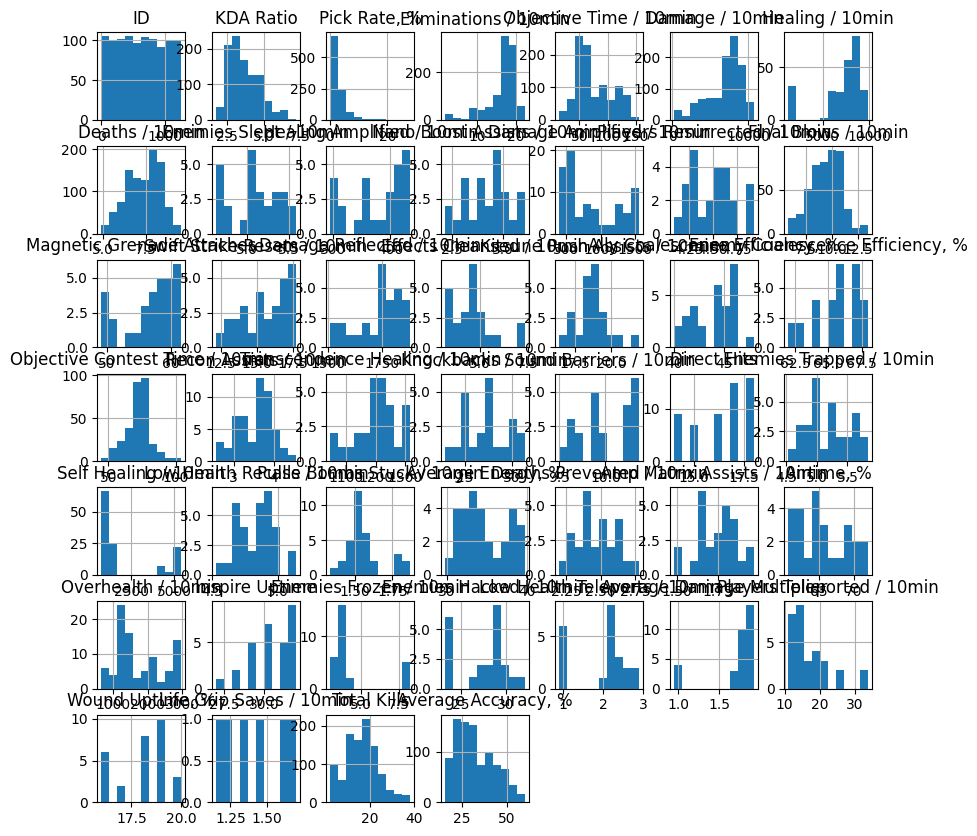

In [74]:
df_train.hist(figsize=(10, 10))
plt.show()

In [75]:
for col in df_train.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_train[col].value_counts(), '\n')

No. of unique values in column Hero:
Hero
Tracer           33
Doomfist         32
Soldier: 76      32
Ashe             32
Roadhog          31
Symmetra         31
Cassidy          31
Orisa            31
Zarya            30
Sojourn          30
Junkrat          30
Moira            30
Junker Queen     29
Brigitte         29
Mei              29
Winston          29
Genji            29
Zenyatta         29
Reaper           28
Hanzo            28
Bastion          27
Ana              27
Sigma            27
Reinhardt        26
Widowmaker       26
Pharah           26
Baptiste         26
Torbjorn         26
D.Va             25
Mercy            25
Kiriko           24
Wrecking Ball    24
Echo             23
Lucio            23
Ramattra         22
Sombra           22
Lifeweaver        6
Name: count, dtype: int64 

No. of unique values in column Skill Tier:
Skill Tier
Master         149
Platinum       149
Silver         144
Bronze         142
Grandmaster    142
Diamond        141
Gold           141
Nam

In [76]:
# Replace '—' with 0 in the 'Ultimates Reflected / 10min' column
df_train['Ultimates Reflected / 10min'] = df_train['Ultimates Reflected / 10min'].replace('—', 0)

# Display the unique values and their counts to confirm the replacement
print(df_train['Ultimates Reflected / 10min'].value_counts())

Ultimates Reflected / 10min
0.08    4
0.05    4
0.04    4
0.03    3
0       3
0.06    2
0.09    2
0.11    2
0.16    1
0.48    1
0.01    1
0.07    1
0.25    1
Name: count, dtype: int64


In [77]:
df_train['Ultimates Reflected / 10min'] = df_train['Ultimates Reflected / 10min'].astype(float)

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1008 non-null   int64  
 1   Hero                             1008 non-null   object 
 2   Skill Tier                       1008 non-null   object 
 3   KDA Ratio                        1008 non-null   float64
 4   Pick Rate, %                     1008 non-null   float64
 5   Eliminations / 10min             1008 non-null   float64
 6   Objective Time / 10min           1008 non-null   int64  
 7   Damage / 10min                   1008 non-null   int64  
 8   Healing / 10min                  251 non-null    float64
 9   Deaths / 10min                   1008 non-null   float64
 10  Enemies Slept / 10min            27 non-null     float64
 11  Healing Amplified / 10min        27 non-null     float64
 12  Nano Boost Assists /

In [79]:
df_test = pd.read_csv("overwatch_performance_test.csv")
df_test.head()

,ID,Hero,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,...,Enemies Frozen / 10min,Enemies Hacked / 10min,Low Health Teleports / 10min,Average Damage Multiplier,Players Teleported / 10min,"Wound Uptime, %",Role,Life Grip Saves / 10min,Total Kills,"Average Accuracy, %"
0,2,Reinhardt,Silver,3.03,3.63,15.29,99,6661,NaN,7.89,...,NaN,NaN,NaN,NaN,NaN,NaN,Tank,NaN,16.92,NaN
1,8,Kiriko,Bronze,4.25,3.52,7.23,70,2154,7872.0,6.25,...,NaN,NaN,NaN,NaN,NaN,NaN,Support,NaN,10.64,21.0
2,18,Tracer,Diamond,2.22,1.59,17.60,65,6739,NaN,8.54,...,NaN,NaN,NaN,NaN,NaN,NaN,Damage,NaN,10.70,21.0
3,23,Junkrat,Platinum,2.72,1.96,16.57,50,8373,NaN,8.17,...,NaN,NaN,NaN,NaN,NaN,NaN,Damage,NaN,14.33,25.0
4,28,Kiriko,Silver,4.67,7.46,8.07,68,2328,8521.0,6.23,...,NaN,NaN,NaN,NaN,NaN,NaN,Support,NaN,11.90,21.5


In [80]:
total_rows_test, total_features_test = df_test.shape
print("Ukuran data test")
print("Jumlah data: ", total_rows_test)
print("Jumlah fitur: ", total_features_test)

Ukuran data test
Jumlah data:  252
Jumlah fitur:  50


In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               252 non-null    int64  
 1   Hero                             252 non-null    object 
 2   Skill Tier                       252 non-null    object 
 3   KDA Ratio                        252 non-null    float64
 4   Pick Rate, %                     252 non-null    float64
 5   Eliminations / 10min             252 non-null    float64
 6   Objective Time / 10min           252 non-null    int64  
 7   Damage / 10min                   252 non-null    int64  
 8   Healing / 10min                  71 non-null     float64
 9   Deaths / 10min                   252 non-null    float64
 10  Enemies Slept / 10min            8 non-null      float64
 11  Healing Amplified / 10min        8 non-null      float64
 12  Nano Boost Assists / 1

In [82]:
df_test.describe()

,ID,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Enemies Slept / 10min,Healing Amplified / 10min,...,Inspire Uptime,Enemies Frozen / 10min,Enemies Hacked / 10min,Low Health Teleports / 10min,Average Damage Multiplier,Players Teleported / 10min,"Wound Uptime, %",Life Grip Saves / 10min,Total Kills,"Average Accuracy, %"
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,71.000000,252.000000,8.000000,8.000000,...,6.000000,6.000000,13.000000,13.000000,4.000000,4.000000,6.000000,1.00,252.000000,227.000000
mean,655.115079,3.797778,2.995040,15.768730,75.666667,6550.603175,7640.140845,7.204365,5.098750,385.625000,...,30.500000,5.041667,27.893846,2.339231,1.150000,13.760000,18.333333,1.52,15.938175,31.617100
std,366.505397,1.030402,2.618951,4.511318,31.486796,2562.926488,1562.779029,0.988655,0.334042,54.495531,...,2.588436,2.314609,2.275890,0.423841,0.387384,1.016464,1.632993,NaN,7.975340,10.956565
min,2.000000,1.630000,0.190000,1.500000,15.000000,260.000000,1341.000000,5.110000,4.690000,293.000000,...,26.000000,2.820000,22.820000,0.980000,0.940000,12.250000,16.000000,1.52,1.950000,15.500000
25%,329.750000,2.970000,1.417500,14.060000,53.000000,4920.500000,7389.000000,6.490000,4.857500,343.080000,...,29.500000,3.580000,27.880000,2.410000,0.940000,13.645000,17.250000,1.52,10.697500,23.000000
50%,661.500000,3.655000,2.190000,17.115000,65.000000,7395.500000,7950.000000,7.280000,4.980000,401.515000,...,31.500000,4.015000,28.510000,2.450000,0.965000,14.170000,18.500000,1.52,15.385000,29.973333
75%,959.500000,4.552500,3.662500,18.912500,103.500000,8471.500000,8551.000000,8.125000,5.440000,423.235000,...,32.000000,6.850000,28.890000,2.500000,1.175000,14.285000,19.750000,1.52,20.162500,40.420000
max,1259.000000,6.640000,17.970000,22.010000,156.000000,10912.000000,9507.000000,9.640000,5.570000,451.290000,...,33.000000,8.170000,31.060000,2.660000,1.730000,14.450000,20.000000,1.52,38.650000,58.000000


In [83]:
df_test.describe(include='object')

,Hero,Skill Tier,Role
count,252,252,252
unique,37,7,3
top,Sombra,Diamond,Damage
freq,13,39,112


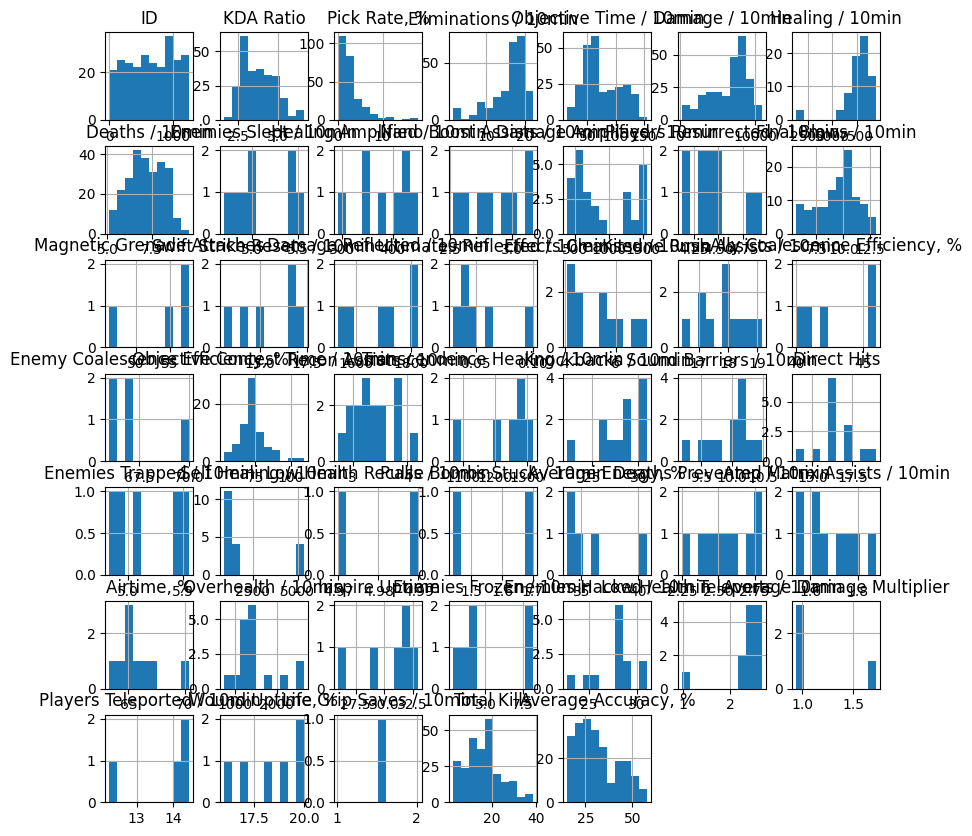

In [84]:
df_test.hist(figsize=(10, 10))
plt.show()

In [85]:
for col in df_test.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_test[col].value_counts(), '\n')

No. of unique values in column Hero:
Hero
Sombra           13
Lucio            12
Echo             12
Kiriko           11
Wrecking Ball    11
D.Va             10
Mercy            10
Reinhardt         9
Pharah            9
Baptiste          9
Widowmaker        9
Torbjorn          9
Bastion           8
Ana               8
Sigma             8
Reaper            7
Hanzo             7
Zenyatta          6
Mei               6
Ramattra          6
Winston           6
Genji             6
Brigitte          6
Junker Queen      6
Junkrat           5
Moira             5
Zarya             5
Sojourn           5
Symmetra          4
Orisa             4
Roadhog           4
Cassidy           4
Soldier: 76       3
Doomfist          3
Ashe              3
Tracer            2
Lifeweaver        1
Name: count, dtype: int64 

No. of unique values in column Skill Tier:
Skill Tier
Diamond        39
Gold           39
Bronze         38
Grandmaster    38
Silver         36
Master         31
Platinum       31
Name: coun

In [86]:
df_sample = pd.read_csv('sample_submission.csv')
df_sample.head()

,ID,Win Rate Classification
0,2,Low
1,8,Low
2,18,Low
3,23,Low
4,28,High


In [87]:
total_rows_sample_submission, total_features_sample_submission = df_sample.shape
print("Ukuran data sample submission")
print("Jumlah data: ", total_rows_sample_submission)
print("Jumlah fitur: ", total_features_sample_submission)

Ukuran data sample submission
Jumlah data:  252
Jumlah fitur:  2


In [88]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       252 non-null    int64 
 1   Win Rate Classification  252 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [89]:
df_sample.describe()

,ID
count,252.000000
mean,655.115079
std,366.505397
min,2.000000
25%,329.750000
50%,661.500000
75%,959.500000
max,1259.000000


In [90]:
df_sample.describe(include='object')

,Win Rate Classification
count,252
unique,2
top,Low
freq,213


In [91]:
for col in df_sample.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_sample[col].value_counts(), '\n')

No. of unique values in column Win Rate Classification:
Win Rate Classification
Low     213
High     39
Name: count, dtype: int64 



#### Preprocessing

##### Penanganan missing values

In [92]:
# Lakukan Preprocessing
print("Jumlah nilai null pada data train")
print(df_train.isnull().sum())

Jumlah nilai null pada data train
ID                                    0
Hero                                  0
Skill Tier                            0
KDA Ratio                             0
Pick Rate, %                          0
Eliminations / 10min                  0
Objective Time / 10min                0
Damage / 10min                        0
Healing / 10min                     757
Deaths / 10min                        0
Enemies Slept / 10min               981
Healing Amplified / 10min           981
Nano Boost Assists / 10min          981
Damage Amplified / 10min            928
Players Resurrected / 10min         983
Final Blows / 10min                 525
Magnetic Grenade Attaches           977
Swift Strike Resets / 10min         979
Damage Reflected / 10min            979
Ultimates Reflected / 10min         979
Effects Cleansed / 10min            984
Kitsune Rush Assists / 10min        984
Ally Coalescence Efficiency, %      978
Enemy Coalescence Efficiency, %     978
Object

In [93]:
# Select only numeric columns
numeric_train = df_train.select_dtypes(include=np.number)

# Calculate skewness for numeric columns
train_skewness = numeric_train.skew()
print("Skewness pada data train")
print(train_skewness)

Skewness pada data train
ID                                 0.022330
KDA Ratio                          0.749653
Pick Rate, %                       3.162480
Eliminations / 10min              -1.840493
Objective Time / 10min             0.517635
Damage / 10min                    -1.005493
Healing / 10min                   -1.608923
Deaths / 10min                    -0.254827
Enemies Slept / 10min             -0.120329
Healing Amplified / 10min         -0.549458
Nano Boost Assists / 10min        -0.164923
Damage Amplified / 10min           0.560510
Players Resurrected / 10min        0.279045
Final Blows / 10min               -0.116059
Magnetic Grenade Attaches         -0.793971
Swift Strike Resets / 10min       -0.471423
Damage Reflected / 10min          -0.820633
Ultimates Reflected / 10min        3.309886
Effects Cleansed / 10min           1.055428
Kitsune Rush Assists / 10min       0.503030
Ally Coalescence Efficiency, %    -0.285952
Enemy Coalescence Efficiency, %   -0.547708
Objecti

In [94]:
def fill_null(df, column_name, distribution_type):
    """
    Fills null values in a DataFrame column based on the distribution type.

    Args:
        df: pandas DataFrame.
        column_name: Name of the column to fill.
        distribution_type: Distribution type of the column ('normal', 'skewed', or 'categorical').

    Returns:
        pandas DataFrame with filled null values.
    """

    if df[column_name].dtype == 'object':  # If the column is categorical (non-numeric)
        # If the column is categorical, use the mode for imputation.
        replacement_value = df[column_name].mode()[0]  # Get the first mode value if multiple modes
    elif distribution_type == 'normal':
        # If the column is normally distributed, use the mean for imputation.
        replacement_value = df[column_name].mean()
    elif distribution_type == 'skewed':
        # If the column is skewed, use the median for imputation.
        replacement_value = df[column_name].median()
    else:
        # For unknown distribution types or if no imputation method is specified, fill with 0.
        replacement_value = 0

    df[column_name] = df[column_name].fillna(replacement_value)
    return df  # Return the updated DataFrame

In [95]:
fill_null(df_train, 'Ultimates Reflected / 10min', '') # data object

,ID,Hero,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,...,Enemies Hacked / 10min,Low Health Teleports / 10min,Average Damage Multiplier,Players Teleported / 10min,"Wound Uptime, %",Role,Life Grip Saves / 10min,Total Kills,"Average Accuracy, %",Win Rate Classification
0,176,Junker Queen,Grandmaster,3.26,1.39,16.18,129,9093,NaN,7.97,...,NaN,NaN,NaN,NaN,19.0,Tank,NaN,16.59,35.500000,Low
1,1157,Mei,Master,3.76,3.35,17.75,81,7215,NaN,7.10,...,NaN,NaN,NaN,NaN,NaN,Damage,NaN,11.74,31.666667,High
2,765,Zarya,Bronze,3.88,1.09,17.83,140,8793,NaN,6.38,...,NaN,NaN,NaN,NaN,NaN,Tank,NaN,20.90,41.000000,Low
3,551,Ashe,Platinum,2.74,2.39,17.09,50,8725,NaN,7.44,...,NaN,NaN,NaN,NaN,NaN,Damage,NaN,17.94,41.000000,Low
4,1104,Bastion,Grandmaster,2.75,1.51,18.66,57,9998,NaN,8.16,...,NaN,NaN,NaN,NaN,NaN,Damage,NaN,35.13,26.000000,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1052,Sombra,Silver,4.70,0.77,15.31,47,4969,NaN,6.28,...,27.91,2.23,NaN,NaN,NaN,Damage,NaN,10.69,33.000000,Low
1004,167,Ana,Master,4.63,22.77,9.75,62,2756,9092.0,5.63,...,NaN,NaN,NaN,NaN,NaN,Support,NaN,8.88,60.000000,High
1005,825,Mei,Diamond,4.18,0.72,17.91,79,6684,NaN,7.33,...,NaN,NaN,NaN,NaN,NaN,Damage,NaN,12.96,30.666667,High
1006,17,Zenyatta,Grandmaster,5.28,11.33,13.37,56,5154,6213.0,6.37,...,NaN,NaN,NaN,NaN,NaN,Support,NaN,11.12,23.500000,High


In [96]:
skewed_attribute = ['Healing / 10min', 'Healing Amplified / 10min',
                    'Damage Amplified / 10min', 'Magnetic Grenade Attaches',
                    'Damage Reflected / 10min', 'Ultimates Reflected / 10min',
                    'Effects Cleansed / 10min', 'Kitsune Rush Assists / 10min',
                    'Enemy Coalescence Efficiency, %', 'Transcendence Healing / 10min',
                    'Self Healing / 10min', 'Pulse Bombs Stuck / 10min',
                    'Inspire Uptime', 'Enemies Frozen / 10min',
                    'Low Health Teleports / 10min', 'Average Damage Multiplier',
                    'Players Teleported / 10min', 'Average Accuracy, %']

for attribute in skewed_attribute:
    fill_null(df_train, attribute, 'skewed')

df_train.head()

,ID,Hero,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,...,Enemies Hacked / 10min,Low Health Teleports / 10min,Average Damage Multiplier,Players Teleported / 10min,"Wound Uptime, %",Role,Life Grip Saves / 10min,Total Kills,"Average Accuracy, %",Win Rate Classification
0,176,Junker Queen,Grandmaster,3.26,1.39,16.18,129,9093,7933.0,7.97,...,NaN,2.235,1.8,15.28,19.0,Tank,NaN,16.59,35.500000,Low
1,1157,Mei,Master,3.76,3.35,17.75,81,7215,7933.0,7.10,...,NaN,2.235,1.8,15.28,NaN,Damage,NaN,11.74,31.666667,High
2,765,Zarya,Bronze,3.88,1.09,17.83,140,8793,7933.0,6.38,...,NaN,2.235,1.8,15.28,NaN,Tank,NaN,20.90,41.000000,Low
3,551,Ashe,Platinum,2.74,2.39,17.09,50,8725,7933.0,7.44,...,NaN,2.235,1.8,15.28,NaN,Damage,NaN,17.94,41.000000,Low
4,1104,Bastion,Grandmaster,2.75,1.51,18.66,57,9998,7933.0,8.16,...,NaN,2.235,1.8,15.28,NaN,Damage,NaN,35.13,26.000000,Low


In [97]:
normal_attribute = ['Enemies Slept / 10min', 'Nano Boost Assists / 10min',
                    'Players Resurrected / 10min', 'Final Blows / 10min',
                    'Swift Strike Resets / 10min', 'Ally Coalescence Efficiency, %',
                    'Objective Contest Time / 10min', 'Recon Assists / 10min',
                    'Knockbacks / 10min', 'Sound Barriers / 10min', 'Direct Hits',
                    'Enemies Trapped / 10min', 'Low Health Recalls / 10min',
                    'Average Energy, %', 'Deaths Prevented / 10min',
                    'Amp Matrix Assists / 10min', 'Airtime, %', 'Overhealth / 10min',
                    'Enemies Hacked / 10min', 'Wound Uptime, %',
                    'Life Grip Saves / 10min']

for attribute in normal_attribute:
    fill_null(df_train, attribute, 'normal')

df_train.head()

,ID,Hero,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,...,Enemies Hacked / 10min,Low Health Teleports / 10min,Average Damage Multiplier,Players Teleported / 10min,"Wound Uptime, %",Role,Life Grip Saves / 10min,Total Kills,"Average Accuracy, %",Win Rate Classification
0,176,Junker Queen,Grandmaster,3.26,1.39,16.18,129,9093,7933.0,7.97,...,27.527727,2.235,1.8,15.28,19.000000,Tank,1.403333,16.59,35.500000,Low
1,1157,Mei,Master,3.76,3.35,17.75,81,7215,7933.0,7.10,...,27.527727,2.235,1.8,15.28,18.068966,Damage,1.403333,11.74,31.666667,High
2,765,Zarya,Bronze,3.88,1.09,17.83,140,8793,7933.0,6.38,...,27.527727,2.235,1.8,15.28,18.068966,Tank,1.403333,20.90,41.000000,Low
3,551,Ashe,Platinum,2.74,2.39,17.09,50,8725,7933.0,7.44,...,27.527727,2.235,1.8,15.28,18.068966,Damage,1.403333,17.94,41.000000,Low
4,1104,Bastion,Grandmaster,2.75,1.51,18.66,57,9998,7933.0,8.16,...,27.527727,2.235,1.8,15.28,18.068966,Damage,1.403333,35.13,26.000000,Low


In [98]:
print("Jumlah nilai null pada data train")
print(df_train.isnull().sum())

Jumlah nilai null pada data train
ID                                 0
Hero                               0
Skill Tier                         0
KDA Ratio                          0
Pick Rate, %                       0
Eliminations / 10min               0
Objective Time / 10min             0
Damage / 10min                     0
Healing / 10min                    0
Deaths / 10min                     0
Enemies Slept / 10min              0
Healing Amplified / 10min          0
Nano Boost Assists / 10min         0
Damage Amplified / 10min           0
Players Resurrected / 10min        0
Final Blows / 10min                0
Magnetic Grenade Attaches          0
Swift Strike Resets / 10min        0
Damage Reflected / 10min           0
Ultimates Reflected / 10min        0
Effects Cleansed / 10min           0
Kitsune Rush Assists / 10min       0
Ally Coalescence Efficiency, %     0
Enemy Coalescence Efficiency, %    0
Objective Contest Time / 10min     0
Recon Assists / 10min              0
Tran

In [99]:
# Lakukan Preprocessing
print("Jumlah nilai null pada data test")
print(df_test.isnull().sum())

Jumlah nilai null pada data test
ID                                   0
Hero                                 0
Skill Tier                           0
KDA Ratio                            0
Pick Rate, %                         0
Eliminations / 10min                 0
Objective Time / 10min               0
Damage / 10min                       0
Healing / 10min                    181
Deaths / 10min                       0
Enemies Slept / 10min              244
Healing Amplified / 10min          244
Nano Boost Assists / 10min         244
Damage Amplified / 10min           227
Players Resurrected / 10min        242
Final Blows / 10min                140
Magnetic Grenade Attaches          248
Swift Strike Resets / 10min        246
Damage Reflected / 10min           246
Ultimates Reflected / 10min        246
Effects Cleansed / 10min           241
Kitsune Rush Assists / 10min       241
Ally Coalescence Efficiency, %     247
Enemy Coalescence Efficiency, %    247
Objective Contest Time / 10min 

In [100]:
# Select only numeric columns
numeric_test = df_test.select_dtypes(include=np.number)

# Calculate skewness for numeric columns
test_skewness = numeric_test.skew()
print("Skewness pada data test")
print(test_skewness)

Skewness pada data test
ID                                -0.091242
KDA Ratio                          0.520452
Pick Rate, %                       2.493307
Eliminations / 10min              -1.442338
Objective Time / 10min             0.459978
Damage / 10min                    -0.744700
Healing / 10min                   -2.744973
Deaths / 10min                    -0.062751
Enemies Slept / 10min              0.401540
Healing Amplified / 10min         -0.591442
Nano Boost Assists / 10min        -0.155476
Damage Amplified / 10min           0.435071
Players Resurrected / 10min        0.855671
Final Blows / 10min               -0.369240
Magnetic Grenade Attaches         -1.742857
Swift Strike Resets / 10min       -0.412969
Damage Reflected / 10min          -0.423828
Ultimates Reflected / 10min        1.614870
Effects Cleansed / 10min           0.424578
Kitsune Rush Assists / 10min      -0.128520
Ally Coalescence Efficiency, %     0.331456
Enemy Coalescence Efficiency, %    1.735582
Objectiv

In [101]:
fill_null(df_test, 'Ultimates Reflected / 10min', '') # data object

,ID,Hero,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,...,Enemies Frozen / 10min,Enemies Hacked / 10min,Low Health Teleports / 10min,Average Damage Multiplier,Players Teleported / 10min,"Wound Uptime, %",Role,Life Grip Saves / 10min,Total Kills,"Average Accuracy, %"
0,2,Reinhardt,Silver,3.03,3.63,15.29,99,6661,NaN,7.89,...,NaN,NaN,NaN,NaN,NaN,NaN,Tank,NaN,16.92,NaN
1,8,Kiriko,Bronze,4.25,3.52,7.23,70,2154,7872.0,6.25,...,NaN,NaN,NaN,NaN,NaN,NaN,Support,NaN,10.64,21.00
2,18,Tracer,Diamond,2.22,1.59,17.60,65,6739,NaN,8.54,...,NaN,NaN,NaN,NaN,NaN,NaN,Damage,NaN,10.70,21.00
3,23,Junkrat,Platinum,2.72,1.96,16.57,50,8373,NaN,8.17,...,NaN,NaN,NaN,NaN,NaN,NaN,Damage,NaN,14.33,25.00
4,28,Kiriko,Silver,4.67,7.46,8.07,68,2328,8521.0,6.23,...,NaN,NaN,NaN,NaN,NaN,NaN,Support,NaN,11.90,21.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1244,Widowmaker,Bronze,2.54,0.73,13.52,19,5272,NaN,7.64,...,NaN,NaN,NaN,NaN,NaN,NaN,Damage,NaN,8.66,44.00
248,1247,Reaper,Diamond,3.13,2.40,20.31,61,7678,NaN,8.28,...,NaN,NaN,NaN,NaN,NaN,NaN,Damage,NaN,14.42,18.00
249,1250,D.Va,Platinum,6.52,4.31,20.96,93,6971,NaN,5.58,...,NaN,NaN,NaN,NaN,NaN,NaN,Tank,NaN,20.25,24.00
250,1251,Lucio,Silver,3.34,5.23,11.21,113,3219,8505.0,7.85,...,NaN,NaN,NaN,NaN,NaN,NaN,Support,NaN,5.97,16.00


In [102]:
skewed_attribute = ['Healing / 10min', 'Healing Amplified / 10min',
                    'Magnetic Grenade Attaches', 'Players Resurrected / 10min',
                    'Enemy Coalescence Efficiency, %', 'Objective Contest Time / 10min',
                    'Transcendence Healing / 10min', 'Knockbacks / 10min',
                    'Sound Barriers / 10min', 'Self Healing / 10min',
                    'Average Energy, %', 'Airtime, %', 'Overhealth / 10min',
                    'Inspire Uptime', 'Enemies Frozen / 10min',
                    'Low Health Teleports / 10min', 'Average Damage Multiplier',
                    'Players Teleported / 10min', 'Average Accuracy, %']

for attribute in skewed_attribute:
    fill_null(df_test, attribute, 'skewed')

df_test.head()

,ID,Hero,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,...,Enemies Frozen / 10min,Enemies Hacked / 10min,Low Health Teleports / 10min,Average Damage Multiplier,Players Teleported / 10min,"Wound Uptime, %",Role,Life Grip Saves / 10min,Total Kills,"Average Accuracy, %"
0,2,Reinhardt,Silver,3.03,3.63,15.29,99,6661,7950.0,7.89,...,4.015,NaN,2.45,0.965,14.17,NaN,Tank,NaN,16.92,29.973333
1,8,Kiriko,Bronze,4.25,3.52,7.23,70,2154,7872.0,6.25,...,4.015,NaN,2.45,0.965,14.17,NaN,Support,NaN,10.64,21.000000
2,18,Tracer,Diamond,2.22,1.59,17.60,65,6739,7950.0,8.54,...,4.015,NaN,2.45,0.965,14.17,NaN,Damage,NaN,10.70,21.000000
3,23,Junkrat,Platinum,2.72,1.96,16.57,50,8373,7950.0,8.17,...,4.015,NaN,2.45,0.965,14.17,NaN,Damage,NaN,14.33,25.000000
4,28,Kiriko,Silver,4.67,7.46,8.07,68,2328,8521.0,6.23,...,4.015,NaN,2.45,0.965,14.17,NaN,Support,NaN,11.90,21.500000


In [103]:
normal_attribute = ['Enemies Slept / 10min', 'Nano Boost Assists / 10min',
                    'Damage Amplified / 10min', 'Final Blows / 10min',
                    'Swift Strike Resets / 10min', 'Damage Reflected / 10min',
                    'Effects Cleansed / 10min', 'Kitsune Rush Assists / 10min',
                    'Ally Coalescence Efficiency, %', 'Recon Assists / 10min',
                    'Direct Hits', 'Enemies Trapped / 10min',
                    'Low Health Recalls / 10min', 'Pulse Bombs Stuck / 10min',
                    'Deaths Prevented / 10min', 'Amp Matrix Assists / 10min',
                    'Enemies Hacked / 10min', 'Wound Uptime, %',
                    'Life Grip Saves / 10min']

for attribute in normal_attribute:
    fill_null(df_test, attribute, 'normal')

df_test.head()

,ID,Hero,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,...,Enemies Frozen / 10min,Enemies Hacked / 10min,Low Health Teleports / 10min,Average Damage Multiplier,Players Teleported / 10min,"Wound Uptime, %",Role,Life Grip Saves / 10min,Total Kills,"Average Accuracy, %"
0,2,Reinhardt,Silver,3.03,3.63,15.29,99,6661,7950.0,7.89,...,4.015,27.893846,2.45,0.965,14.17,18.333333,Tank,1.52,16.92,29.973333
1,8,Kiriko,Bronze,4.25,3.52,7.23,70,2154,7872.0,6.25,...,4.015,27.893846,2.45,0.965,14.17,18.333333,Support,1.52,10.64,21.000000
2,18,Tracer,Diamond,2.22,1.59,17.60,65,6739,7950.0,8.54,...,4.015,27.893846,2.45,0.965,14.17,18.333333,Damage,1.52,10.70,21.000000
3,23,Junkrat,Platinum,2.72,1.96,16.57,50,8373,7950.0,8.17,...,4.015,27.893846,2.45,0.965,14.17,18.333333,Damage,1.52,14.33,25.000000
4,28,Kiriko,Silver,4.67,7.46,8.07,68,2328,8521.0,6.23,...,4.015,27.893846,2.45,0.965,14.17,18.333333,Support,1.52,11.90,21.500000


In [104]:
print("Jumlah nilai null pada data test")
print(df_test.isnull().sum())

Jumlah nilai null pada data test
ID                                 0
Hero                               0
Skill Tier                         0
KDA Ratio                          0
Pick Rate, %                       0
Eliminations / 10min               0
Objective Time / 10min             0
Damage / 10min                     0
Healing / 10min                    0
Deaths / 10min                     0
Enemies Slept / 10min              0
Healing Amplified / 10min          0
Nano Boost Assists / 10min         0
Damage Amplified / 10min           0
Players Resurrected / 10min        0
Final Blows / 10min                0
Magnetic Grenade Attaches          0
Swift Strike Resets / 10min        0
Damage Reflected / 10min           0
Ultimates Reflected / 10min        0
Effects Cleansed / 10min           0
Kitsune Rush Assists / 10min       0
Ally Coalescence Efficiency, %     0
Enemy Coalescence Efficiency, %    0
Objective Contest Time / 10min     0
Recon Assists / 10min              0
Trans

##### Penanganan nilai duplikat

In [105]:
print("Jumlah nilai duplikat pada data train")
print(df_train.duplicated().sum())

Jumlah nilai duplikat pada data train
0


In [106]:
print("Jumlah nilai duplikat pada data test")
print(df_test.duplicated().sum())

Jumlah nilai duplikat pada data test
0


##### Penanganan outliers

In [107]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

Boxplot data train


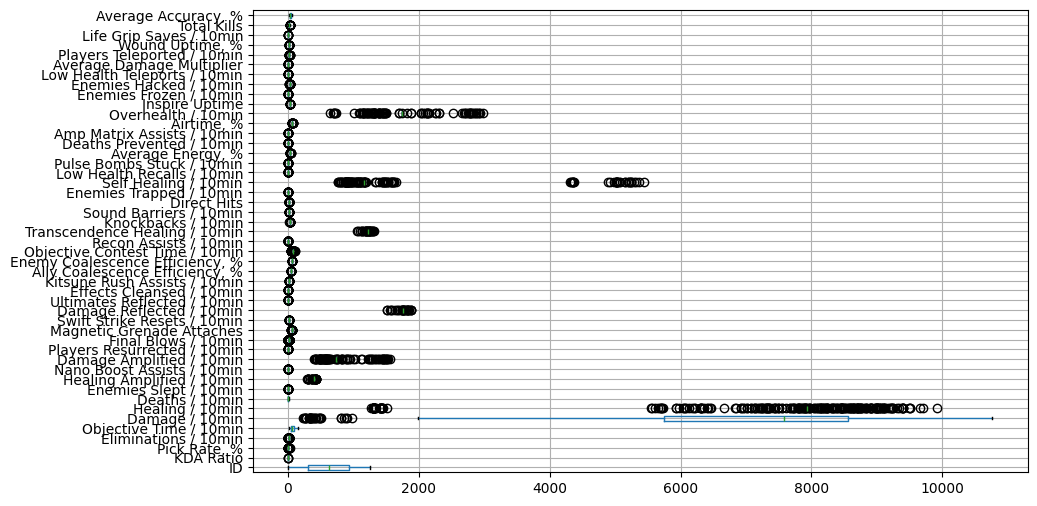

In [108]:
print("Boxplot data train")
plt.figure(figsize=(10, 6))
boxplot = df_train.boxplot(figsize=(12,10), vert=False)
plt.show()

In [109]:
numerical_train = df_train.select_dtypes(include=np.number)
print("Outlier pada data train")
outliers_train = dict(check_outlier(numerical_train).sum())

Outlier pada data train
Outlier pada tiap atribut:
ID                                   0
KDA Ratio                            3
Pick Rate, %                        59
Eliminations / 10min                98
Objective Time / 10min               0
Damage / 10min                      31
Healing / 10min                    250
Deaths / 10min                       0
Enemies Slept / 10min               27
Healing Amplified / 10min           26
Nano Boost Assists / 10min          27
Damage Amplified / 10min            80
Players Resurrected / 10min         25
Final Blows / 10min                465
Magnetic Grenade Attaches           30
Swift Strike Resets / 10min         29
Damage Reflected / 10min            28
Ultimates Reflected / 10min         26
Effects Cleansed / 10min            24
Kitsune Rush Assists / 10min        24
Ally Coalescence Efficiency, %      30
Enemy Coalescence Efficiency, %     23
Objective Contest Time / 10min     306
Recon Assists / 10min               54
Transcendence

Boxplot data test


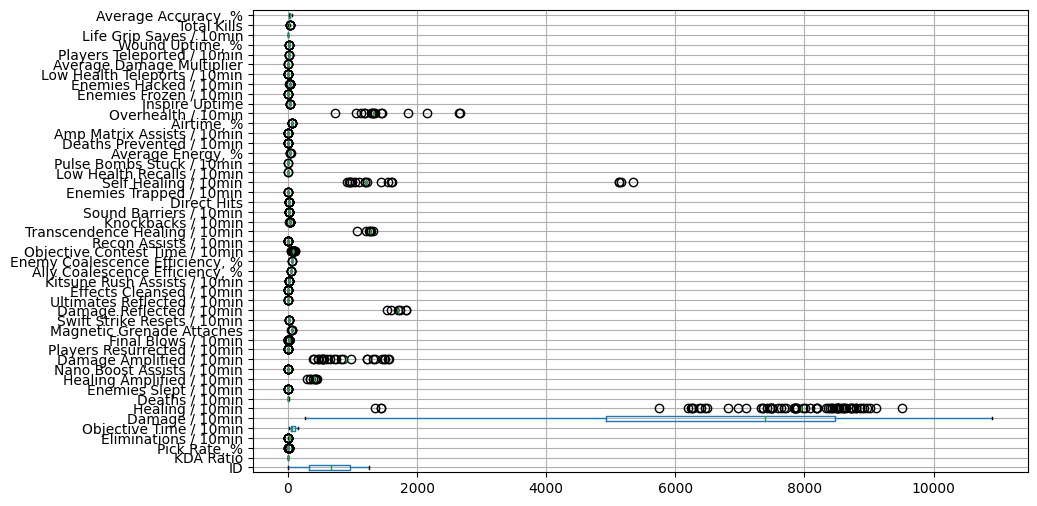

In [110]:
print("Boxplot data test")
plt.figure(figsize=(10, 6))
boxplot = df_test.boxplot(figsize=(12,10), vert=False)
plt.show()

In [111]:
numerical_test = df_test.select_dtypes(include=np.number)
print("Outlier pada data test")
outliers_test = dict(check_outlier(numerical_test).sum())

Outlier pada data test
Outlier pada tiap atribut:
ID                                   0
KDA Ratio                            0
Pick Rate, %                        17
Eliminations / 10min                11
Objective Time / 10min               0
Damage / 10min                       0
Healing / 10min                     70
Deaths / 10min                       0
Enemies Slept / 10min                8
Healing Amplified / 10min            8
Nano Boost Assists / 10min           8
Damage Amplified / 10min            25
Players Resurrected / 10min         10
Final Blows / 10min                112
Magnetic Grenade Attaches            4
Swift Strike Resets / 10min          6
Damage Reflected / 10min             6
Ultimates Reflected / 10min          6
Effects Cleansed / 10min            11
Kitsune Rush Assists / 10min        11
Ally Coalescence Efficiency, %       5
Enemy Coalescence Efficiency, %      3
Objective Contest Time / 10min      72
Recon Assists / 10min               16
Transcendence 

##### Penanganan encoding fitur kategorikal

In [112]:
for col in df_train.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_train[col].value_counts(), '\n')

No. of unique values in column Hero:
Hero
Tracer           33
Doomfist         32
Soldier: 76      32
Ashe             32
Roadhog          31
Symmetra         31
Cassidy          31
Orisa            31
Zarya            30
Sojourn          30
Junkrat          30
Moira            30
Junker Queen     29
Brigitte         29
Mei              29
Winston          29
Genji            29
Zenyatta         29
Reaper           28
Hanzo            28
Bastion          27
Ana              27
Sigma            27
Reinhardt        26
Widowmaker       26
Pharah           26
Baptiste         26
Torbjorn         26
D.Va             25
Mercy            25
Kiriko           24
Wrecking Ball    24
Echo             23
Lucio            23
Ramattra         22
Sombra           22
Lifeweaver        6
Name: count, dtype: int64 

No. of unique values in column Skill Tier:
Skill Tier
Master         149
Platinum       149
Silver         144
Bronze         142
Grandmaster    142
Diamond        141
Gold           141
Nam

In [113]:
df_train_encoded = df_train.copy()

# One-Hot Encoding
# List of categorical nominal columns to encode
nominal_columns = [
    "Hero", "Role"
]

# Apply One-Hot Encoding
df_train_encoded = pd.get_dummies(df_train_encoded, columns=nominal_columns, drop_first=True)

# Display the transformed dataset
df_train_encoded.head()

,ID,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Enemies Slept / 10min,...,Hero_Symmetra,Hero_Torbjorn,Hero_Tracer,Hero_Widowmaker,Hero_Winston,Hero_Wrecking Ball,Hero_Zarya,Hero_Zenyatta,Role_Support,Role_Tank
0,176,Grandmaster,3.26,1.39,16.18,129,9093,7933.0,7.97,5.096296,...,False,False,False,False,False,False,False,False,False,True
1,1157,Master,3.76,3.35,17.75,81,7215,7933.0,7.10,5.096296,...,False,False,False,False,False,False,False,False,False,False
2,765,Bronze,3.88,1.09,17.83,140,8793,7933.0,6.38,5.096296,...,False,False,False,False,False,False,True,False,False,True
3,551,Platinum,2.74,2.39,17.09,50,8725,7933.0,7.44,5.096296,...,False,False,False,False,False,False,False,False,False,False
4,1104,Grandmaster,2.75,1.51,18.66,57,9998,7933.0,8.16,5.096296,...,False,False,False,False,False,False,False,False,False,False


In [114]:
SkillTier_mapping = {
	'Bronze': 1,
	'Silver': 2,
	'Gold': 3,
  'Platinum': 4,
  'Diamond': 5,
  'Master': 6,
  'Grandmaster': 7,
}

WinRateClassification_mapping = {
  'Low': 0,
	'High': 1
}

df_train_encoded['Skill Tier'] = df_train_encoded['Skill Tier'].map(SkillTier_mapping)
df_train_encoded['Win Rate Classification'] = df_train_encoded['Win Rate Classification'].map(WinRateClassification_mapping)
df_train_encoded.head()

,ID,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Enemies Slept / 10min,...,Hero_Symmetra,Hero_Torbjorn,Hero_Tracer,Hero_Widowmaker,Hero_Winston,Hero_Wrecking Ball,Hero_Zarya,Hero_Zenyatta,Role_Support,Role_Tank
0,176,7,3.26,1.39,16.18,129,9093,7933.0,7.97,5.096296,...,False,False,False,False,False,False,False,False,False,True
1,1157,6,3.76,3.35,17.75,81,7215,7933.0,7.10,5.096296,...,False,False,False,False,False,False,False,False,False,False
2,765,1,3.88,1.09,17.83,140,8793,7933.0,6.38,5.096296,...,False,False,False,False,False,False,True,False,False,True
3,551,4,2.74,2.39,17.09,50,8725,7933.0,7.44,5.096296,...,False,False,False,False,False,False,False,False,False,False
4,1104,7,2.75,1.51,18.66,57,9998,7933.0,8.16,5.096296,...,False,False,False,False,False,False,False,False,False,False


In [115]:
for col in df_test.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_test[col].value_counts(), '\n')

No. of unique values in column Hero:
Hero
Sombra           13
Lucio            12
Echo             12
Kiriko           11
Wrecking Ball    11
D.Va             10
Mercy            10
Reinhardt         9
Pharah            9
Baptiste          9
Widowmaker        9
Torbjorn          9
Bastion           8
Ana               8
Sigma             8
Reaper            7
Hanzo             7
Zenyatta          6
Mei               6
Ramattra          6
Winston           6
Genji             6
Brigitte          6
Junker Queen      6
Junkrat           5
Moira             5
Zarya             5
Sojourn           5
Symmetra          4
Orisa             4
Roadhog           4
Cassidy           4
Soldier: 76       3
Doomfist          3
Ashe              3
Tracer            2
Lifeweaver        1
Name: count, dtype: int64 

No. of unique values in column Skill Tier:
Skill Tier
Diamond        39
Gold           39
Bronze         38
Grandmaster    38
Silver         36
Master         31
Platinum       31
Name: coun

In [116]:
df_test_encoded = df_test.copy()

# One-Hot Encoding
# List of categorical nominal columns to encode
nominal_columns = [
    "Hero", "Role"
]

# Apply One-Hot Encoding
df_test_encoded = pd.get_dummies(df_test_encoded, columns=nominal_columns, drop_first=True)

# Display the transformed dataset
df_test_encoded.head()

,ID,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Enemies Slept / 10min,...,Hero_Symmetra,Hero_Torbjorn,Hero_Tracer,Hero_Widowmaker,Hero_Winston,Hero_Wrecking Ball,Hero_Zarya,Hero_Zenyatta,Role_Support,Role_Tank
0,2,Silver,3.03,3.63,15.29,99,6661,7950.0,7.89,5.09875,...,False,False,False,False,False,False,False,False,False,True
1,8,Bronze,4.25,3.52,7.23,70,2154,7872.0,6.25,5.09875,...,False,False,False,False,False,False,False,False,True,False
2,18,Diamond,2.22,1.59,17.60,65,6739,7950.0,8.54,5.09875,...,False,False,True,False,False,False,False,False,False,False
3,23,Platinum,2.72,1.96,16.57,50,8373,7950.0,8.17,5.09875,...,False,False,False,False,False,False,False,False,False,False
4,28,Silver,4.67,7.46,8.07,68,2328,8521.0,6.23,5.09875,...,False,False,False,False,False,False,False,False,True,False


In [117]:
df_test_encoded['Skill Tier'] = df_test_encoded['Skill Tier'].map(SkillTier_mapping)
df_test_encoded.head()

,ID,Skill Tier,KDA Ratio,"Pick Rate, %",Eliminations / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,Enemies Slept / 10min,...,Hero_Symmetra,Hero_Torbjorn,Hero_Tracer,Hero_Widowmaker,Hero_Winston,Hero_Wrecking Ball,Hero_Zarya,Hero_Zenyatta,Role_Support,Role_Tank
0,2,2,3.03,3.63,15.29,99,6661,7950.0,7.89,5.09875,...,False,False,False,False,False,False,False,False,False,True
1,8,1,4.25,3.52,7.23,70,2154,7872.0,6.25,5.09875,...,False,False,False,False,False,False,False,False,True,False
2,18,5,2.22,1.59,17.60,65,6739,7950.0,8.54,5.09875,...,False,False,True,False,False,False,False,False,False,False
3,23,4,2.72,1.96,16.57,50,8373,7950.0,8.17,5.09875,...,False,False,False,False,False,False,False,False,False,False
4,28,2,4.67,7.46,8.07,68,2328,8521.0,6.23,5.09875,...,False,False,False,False,False,False,False,False,True,False


#### Modeling

In [118]:
id = df_test['ID'].copy()

In [119]:
X = df_train_encoded.drop(['ID', 'Win Rate Classification'], axis=1)
y = df_train_encoded['Win Rate Classification']

In [120]:
X_test = df_test_encoded.drop(['ID'], axis=1)

In [121]:
# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Added random_state for reproducibility

In [122]:
# Initialize the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42)) # Added random_state for reproducibility
])

In [123]:
# Store predictions for each fold
y_pred_oof = pd.Series([None] * len(y))
y_pred_test_all_folds = []

In [124]:
from sklearn.metrics import classification_report
# Perform Stratified K-Fold cross-validation
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y)):
    print(f"Fold {fold+1}/{5}")

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred_val = pipeline.predict(X_val)
    y_pred_oof.iloc[val_index] = y_pred_val

    # Make predictions on the test set
    y_pred_test = pipeline.predict(X_test)
    y_pred_test_all_folds.append(y_pred_test)

    # Evaluate performance on the validation set for this fold
    print(f"Fold {fold+1} Validation Report:")
    print(classification_report(y_val, y_pred_val))
    print("-" * 30)

Fold 1/5


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1 Validation Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       229
           1       0.78      0.75      0.76       107

    accuracy                           0.85       336
   macro avg       0.83      0.82      0.83       336
weighted avg       0.85      0.85      0.85       336

------------------------------
Fold 2/5


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2 Validation Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       229
           1       0.82      0.70      0.75       107

    accuracy                           0.85       336
   macro avg       0.84      0.81      0.83       336
weighted avg       0.85      0.85      0.85       336

------------------------------
Fold 3/5
Fold 3 Validation Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       229
           1       0.77      0.71      0.74       107

    accuracy                           0.84       336
   macro avg       0.82      0.80      0.81       336
weighted avg       0.84      0.84      0.84       336

------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [125]:
# Average the predictions across all folds for the test set
import numpy as np
y_pred = np.mean(np.array(y_pred_test_all_folds), axis=0).round().astype(int)

In [126]:
submission_df = pd.DataFrame({
    'ID': id,
    'Win Rate Classification': y_pred
})

In [127]:
reverse_category_mapping = {v: k for k, v in WinRateClassification_mapping.items()}
submission_df['Win Rate Classification'] = submission_df['Win Rate Classification'].map(reverse_category_mapping)

In [128]:
submission_df.to_csv("submission_2206819413.csv", index=False)
print("Submission file saved successfully!")

Submission file saved successfully!
